# Solar Production Data Analysis

## Objective
This notebook will analysis solar production data using the data science lifecyce outlined here: link
https://docs.google.com/document/d/1gKr6j7s02hjilNhqYrjDK7t6jqR092hzezn-MB09EZo/edit#heading=h.mbjsiz6n6jlo

## Contents:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

python version: 3.9.0

requirements:
see imports

## 0 Setup

### 0.1 Load Packages

In [1]:
import pandas as pd # pandas for data manipulation / analysis
import numpy as np # numpy for math
import matplotlib.pyplot as plt # pyplot for plotting and visualization
import datetime # datetime for computing times
import seaborn as sns # fancier plots
import statsmodels.api as statsmodels # for regression
from scipy import stats # more regression (and other statistics)
from sklearn import linear_model # regression model

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # set figsize for all future plots

/Users/katherineli/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### 0.2 Load Data

In [2]:
df_production = pd.read_csv('daily_contract_production.csv', header = None)
df_production.columns = ['holding_company_id', 'project_company_id', 'contract_id', 'size_kwdc', 'created_on', \
                'updated_on', 'production_date', 'ato_date', 'actual_kwh', 'expected_kwh', \
                'weather_adjusted_expected_kwh']
df_contracts = pd.read_csv('d_contracts.csv')

df = df_production.join(df_contracts.set_index('id'), on = 'contract_id', rsuffix="DROP").filter(regex="^(?!.*DROP)")

df.head()

,holding_company_id,project_company_id,contract_id,size_kwdc,created_on,updated_on,production_date,ato_date,actual_kwh,expected_kwh,...,host_type,revenue_type,interconnection_type,registry_facility_name,cref_short_name,subscriber_orginization,system_yield_as_built,system_yield_finance,annual_degradation_engr,annual_degradation_finance
0,15,44,4FbAzTVD,25.13,49:53.6,53:14.9,00:00.0,11/29/18,NaN,42.908097,...,C&I,NEM,NEM,NON241648,NaN,NaN,1131.0,1131.0,0.005,NaN
1,14,50,56XBWDhT,40.00,49:53.6,53:14.9,00:00.0,9/28/18,NaN,71.340590,...,C&I,NEM,NEM,NON241695,NaN,NaN,954.7,1170.0,0.005,0.005
2,28,71,5Q6T8Cm7,6.70,49:53.6,53:14.9,00:00.0,11/28/18,0.139945,12.643548,...,Residential,NEM,NEM,NON241642,NaN,NaN,1250.0,1250.0,0.005,0.005
3,14,43,8EaZmYXK,26.18,49:53.6,53:14.9,00:00.0,3/10/18,23.113000,50.342822,...,C&I,CREF,CREF,NON241367,NCS07,Arcadia,1240.8,1327.0,0.005,NaN
4,15,44,8GniqiNd,77.52,49:53.6,53:14.9,00:00.0,7/12/18,NaN,142.074655,...,C&I,NEM,NEM,NON241708,NaN,NaN,1214.0,1214.0,0.005,NaN


## 1 Business Understanding
### Sections
#### 1.1 Question Definition
First, define your question(s) of interest from a business perspective. 
#### 1.2 Success Criteria
What is the goal of the project you propose, and what are the criteria for a successful or useful outcome? Assess the situation, including resources, constraints, assumptions, requirements. 
#### 1.3 Statistical Criteria 
Then, translate business objective(s) and metric(s) for success to data mining goals. If the business goal is to increase sales, the data mining goal might be to predict variance in sales based on advertising money spent, production costs, etc. 
#### 1.4 Project Plan
Finally, produce a project plan specifying the steps to be taken throughout the rest of the project, including initial assessment of tools and techniques, durations, dependencies, etc.

What is the goal of this project?
What are the criteria for a successful outcome?

Business goals are:
What will the production be of a new system?
What will the performance be of a new system?

Other questions to answer if time permits:
What is the quality of the data?
understand the fleet better - how many systems, when were they installed
indentify and predict poor performance?
how might we improve performance?
Can we predict future production?



### 1.1 Question Definition
First, define your question(s) of interest from a business perspective.

Solar systems convert light energy from the sun to electricity. The amount of electricity produced is called "production" and the amount of electricity produced in reality compared to expectation is called "performance".
A commercial and residential solar installer is interested to learn if they can predict the production and performance of a new solar system. They have provided data on the production and performance of their fleet with the hopes that it can be used as training data for a model. Among other things, the model and analysis should tell them basic information, like growth of their fleet, average performance, and top performing systems, but also advanced statistics, like if the financial company is correlated to performance, which months are the best to install a new system, and what is the best estimation for annual degradation.

### 1.2 Success Criteria
What is the goal of the project you propose, and what are the criteria for a successful or useful outcome? Assess the situation, including resources, constraints, assumptions, requirements. 

#### 1.2.1 Goal
#### 1.2.2 Criteria for success
#### 1.2.3 Resources
#### 1.2.4 Constraints
#### 1.2.5 Assumptions
#### 1.2.6 Requirements


Are all holding companies made equal?
The Solar systems convert light energy from the sun to electricity. The amount of electricity produced is called "production" and the amount of electricity produced in reality compared to expectation is called "performance".
A commercial and residential solar installer is interested to learn if they can predict the production and performance of a new solar system.
They have provided data on the production and performance of their fleet with the hopes that it can be used as training data for a model.
Among other things, the model and analysis should tell them basic information, like growth of their fleet, average performance, and top performing systems, but also advanced statistics, like if the financial company is correlated to performance, which months are the best to install a new system, and what is the best estimation for annual degradation.

### 1.3 Statistical Criteria 
Then, translate business objective(s) and metric(s) for success to data mining goals. If the business goal is to increase sales, the data mining goal might be to predict variance in sales based on advertising money spent, production costs, etc.

## 2 Data Understanding
### 2.1 List all datasets required
Collect initial data and list all datasets acquired, locations, methods of acquisition, and any problems encountered. 

Data were synthesized from 2 excel documents provided by Denny. These sheets were extracted from the solar database maintained by Denny using a SQL query. The first document, contained in the dataframe "data" above, contains core information on the production of solar contracts over time. It contains also contains descriptive data like the ato date of each system, its size, ownership, etc.  This "daily contract production" sheet is the third iteration after the first contained too many missing values, and the second contained only 4 columns. The SQL query used to extract these data was eventually fixed by Denny and another intern, Chris. The second document, extracted from the same database using a different SQL query, contains other, more detailed, decsriptive data like contract type, some financial info, estimated degradation rates, etc. There were no major problems with these data.

### 2.2 Gross properties of the data
 Describe the gross properties of the data, including its format, shape, field identities, etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84216 entries, 0 to 84215
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   holding_company_id             84216 non-null  int64  
 1   project_company_id             84216 non-null  int64  
 2   contract_id                    84216 non-null  object 
 3   size_kwdc                      84216 non-null  float64
 4   created_on                     84216 non-null  object 
 5   updated_on                     84148 non-null  object 
 6   production_date                84216 non-null  object 
 7   ato_date                       84216 non-null  object 
 8   actual_kwh                     80982 non-null  float64
 9   expected_kwh                   84216 non-null  float64
 10  weather_adjusted_expected_kwh  84216 non-null  float64
 11  site_id                        84216 non-null  int64  
 12  in_service_date                41423 non-null 

This dataset has 23 columns and 84,215 rows.

Holding and project company ids refer to the company that financed and owns/operates a system respectively, while contract ids  provide a unique identifier for each solar system. These should be objects or strings as they are unique identifiers, not data types that can be compared. 

Solar system sizes are also provided in units of kilowatts DC and describe the production capacity of a system.

Created on and updated on dates are relevant mostly for database management rather than describing any feature of the solar systems themselves, so they should not be relevant to this analysis.

Production date (the day of operation), ato date (the first day a system was licensed / legally allowed to go into production), and in-service date (the first day a system was actually turned on and started producing power) should be, as evident, dates. Notably, while production and ato dates are known for all data points included, in-service date only exists for around half. Thus, it may be appropriate to sub in ato dates where in-service dates are missing.

'actual_kwh', 'expected_kwh', and 'weather_adjusted_expected_kwh' all refer to production: the actual amount of energy produced by a system on a given production day, measured in kilowatt-hours, the expected energy produced based on complex algorithmic predictions, and the expected energy produced including adjustments for weather, respectively. Again, note: actual production values are missing for around 3234/84216 data points. These missing values likely indicate non-comms.

The site id column has not been fully developed, so it is currently filled with 1s as placeholders and will not be relevant to this analysis.

The host type column refers to the type of contract a system represents: commercial&industrial or residential. These are categorical, so it is appropriate for them to remain objects.

The revenue type column refers to the type of contract under which a solar system is paid; interconnection type tells us whether energy is paid directly through net metering (NEM) or leased out and split through community renewable energy facilities (CREF).

Registry facility names and cref short names are unique identifiers, so appropriately objects.

Subscriber organization likely tells us whether a system was brokered through some outside organization who brought in indirect customers.

System yield as built refers to the actual expected yield (kwh/kw) per year of each system, and system yield finance is the number used for financial calculations. Annual degradation (engr) is the estimated degradation rate of each solar system by engineering, and annual degradation (finance) is the estimate used for finances.

In [4]:
# implement some of the fixes described above

# drop irrelevant columns
df.drop(['created_on', 'updated_on', 'site_id'], axis = 1, inplace = True)

# convert time-bearing columns to times (originally objects)
time_cols = [*range(4, 6), 9]
for i in time_cols:
    df[df.columns[i]] = pd.to_datetime(df[df.columns[i]])
    
# convert holding and project company ids to strings instead of ints so we don't accidentally do math on them
df.to_string(columns = ['holding_company_id', 'project_company_id'])

# fill in missing in service dates with ato dates
for i in df.index:
    if pd.isnull(df['in_service_date'][i]):
        df['in_service_date'][i] = df['ato_date'][i]

/Users/katherineli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84216 entries, 0 to 84215
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   holding_company_id             84216 non-null  int64         
 1   project_company_id             84216 non-null  int64         
 2   contract_id                    84216 non-null  object        
 3   size_kwdc                      84216 non-null  float64       
 4   production_date                84216 non-null  datetime64[ns]
 5   ato_date                       84216 non-null  datetime64[ns]
 6   actual_kwh                     80982 non-null  float64       
 7   expected_kwh                   84216 non-null  float64       
 8   weather_adjusted_expected_kwh  84216 non-null  float64       
 9   in_service_date                84216 non-null  datetime64[ns]
 10  host_type                      84216 non-null  object        
 11  revenue_type   

### 2.3 Feature Analysis
Explore key attributes, simple statistics, visualizations. Identify potential relationships and interesting data characteristics to inform initial hypotheses. 

#### 2.3.1 Portfolio

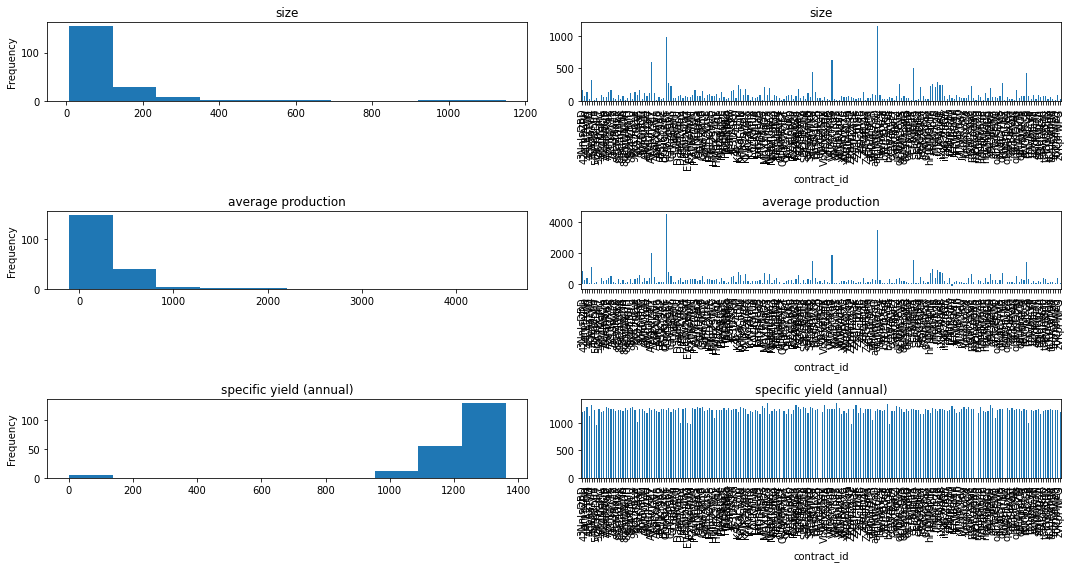

In [6]:
fig, axes = plt.subplots(nrows = 3, ncols = 2)

group = df.groupby(['contract_id'])

# plot average solar system size
group.mean()['size_kwdc'].plot(kind = 'hist', figsize = (15, 8), ax = axes[0, 0], \
title = 'size')

# plot average solar system production
group.mean()['actual_kwh'].plot(kind = 'hist', figsize = (15, 8), ax = axes[1, 0], \
title = 'average production')

# plot average solar system yield
group.mean()['system_yield_as_built'].plot(kind = 'hist', figsize = (15, 8), \
ax = axes[2, 0], title = 'specific yield (annual)')

# plot average solar system size
group.mean()['size_kwdc'].plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 1], \
title = 'size')

# plot average solar system production
group.mean()['actual_kwh'].plot(kind = 'bar', figsize = (15, 8), ax = axes[1, 1], \
title = 'average production')

# plot average solar system yield
group.mean()['system_yield_as_built'].plot(kind = 'bar', figsize = (15, 8), \
ax = axes[2, 1], title = 'specific yield (annual)')

plt.tight_layout()

In [7]:
# get average / mean column values by contract (can also do max, min, etc.)

group.mean()

,holding_company_id,project_company_id,size_kwdc,actual_kwh,expected_kwh,weather_adjusted_expected_kwh,system_yield_as_built,system_yield_finance,annual_degradation_engr,annual_degradation_finance
contract_id,,,,,,,,,,
3NnJsDBD,30.000000,26.000000,172.80,818.966745,753.852275,804.048556,1202.4,1202.4,0.005,NaN
42gm9ZRb,36.000000,85.000000,72.20,292.040526,336.928888,336.928888,1215.9,1215.9,0.005,NaN
4CLfAuJq,2.594502,32.474227,137.00,421.977237,440.965338,434.769781,1283.0,1283.0,0.005,0.0025
4FbAzTVD,14.839822,44.249166,25.13,75.072695,77.572922,76.059615,1131.0,1131.0,0.005,NaN
4qv9aTyM,4.472401,8.944801,322.90,1127.756060,1185.079051,1159.594450,1318.0,1318.0,0.005,NaN
...,...,...,...,...,...,...,...,...,...,...
tDUAwoqa,7.842105,37.134737,60.06,164.500244,216.353370,209.502031,1248.0,1250.0,0.005,0.0025
tbANVfMW,5.684685,11.369369,32.40,126.611421,116.154486,113.068259,1239.0,1239.0,0.005,NaN
tnmvfwZ9,7.873418,8.075949,15.10,69.384894,66.973181,69.096800,1233.2,1233.2,0.005,NaN


#### 2.3.2 Size

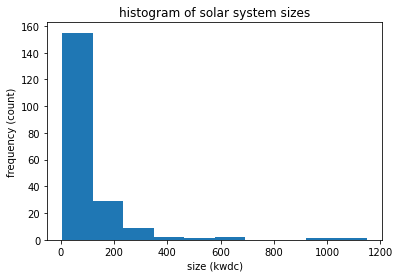

In [8]:
# get an idea of solar system sizes

size_unique = group.apply(lambda x: x['size_kwdc'].unique()[0])
plt.hist(size_unique)
plt.title('histogram of solar system sizes')
plt.xlabel('size (kwdc)')
plt.ylabel('frequency (count)')
plt.show()

Observing contract sizes, the histogram below is heavily skewed left with many small contracts and a few big ones.

In [9]:
# find the problematic contract

sizes = group.apply(lambda x: x['size_kwdc'].unique())

for i in range(len(sizes)): 
    elem = sizes[sizes.index[i]]
    if len(elem) != 1:
        print(sizes.index[i], elem)

9EUCfnGw [218.2  82.7]


Interestingly, there is one contract with multiple sizes! This is likely an anomaly, but we will need to check with the database to see which one is right and why there are 2.
# check this thing??

#### 2.3.9 Production

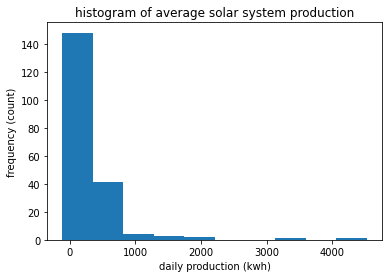

In [10]:
# plot histogram of average solar system production (skewed left w/ many smaller values and some large ones)

avg_contract_production = group.mean()['actual_kwh'] # store average production by contract to use later
plt.hist(avg_contract_production)
plt.title('histogram of average solar system production')
plt.xlabel('daily production (kwh)')
plt.ylabel('frequency (count)')
plt.show()

In [11]:
df.corr()['actual_kwh']

holding_company_id              -0.041691
project_company_id              -0.065460
size_kwdc                        0.165128
actual_kwh                       1.000000
expected_kwh                     0.178816
weather_adjusted_expected_kwh    0.180223
system_yield_as_built            0.020092
system_yield_finance             0.012633
annual_degradation_engr               NaN
annual_degradation_finance      -0.191320
Name: actual_kwh, dtype: float64

This plot of average system production looks similar to the histogram of sizes from above - this makes sense because production should correspond exactly with size and, as such, should be distributed similarly. The plot is again heavily skewed left with a few systems producing very highly and most producing smaller amounts on average. The list of correlations between production and other numeric columns is, as we would expect, strong for size as well as expected production and weather adjusted production. This means our existing predictions (of expected production) are pretty accurate, which is good (though there is still room for improvement). One concerning point about the histogram is that the first bar does not start from 0, meaning there may be some contracts with net *negative* production. Below, we may want to look into this.

In [12]:
[elem for elem in avg_contract_production.items() if elem[1] < 0]

[('jZWEeuhJ', -108.57662385387746)]

In [13]:
# examine the anomalous contract w/ net negative production

jZWEeuhJ = df[df['contract_id'] == 'jZWEeuhJ']
jZWEeuhJ[jZWEeuhJ['actual_kwh'] < 0] # filter for only negative production values - some EXTREMELY negative

,holding_company_id,project_company_id,contract_id,size_kwdc,production_date,ato_date,actual_kwh,expected_kwh,weather_adjusted_expected_kwh,in_service_date,host_type,revenue_type,interconnection_type,registry_facility_name,cref_short_name,subscriber_orginization,system_yield_as_built,system_yield_finance,annual_degradation_engr,annual_degradation_finance
43803,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-203217.536100,150.976559,124.555661,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN
44315,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-203769.953800,150.976559,124.555661,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN
44443,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-59.278923,150.976559,124.555661,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN
44571,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-147.025910,150.976559,124.555661,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN
44699,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-155.335679,150.976559,124.555661,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN
45339,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-205248.635600,150.976559,124.555661,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN
45594,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-205792.877800,150.976559,124.555661,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN
45721,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-38.183055,150.976559,124.555661,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN
46105,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-206639.162200,150.976559,124.555661,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN
60484,21,57,jZWEeuhJ,43.92,2021-08-04,2018-07-10,-0.142861,85.334577,86.102588,2018-07-10,C&I,NaN,NEM,NON231026,NaN,NaN,1300.0,1300.0,0.005,NaN


Looking further into the contract with negative production, we see, in fact, some VERY extreme negative values. We should probably check if there are more extreme values in the dataset and, if so, delete them so they don't skew our data.

In [14]:
# find all datapoints with actual production values less than -10 (concerning - for further inspection)

anomalies = {}

for i in df.index:
    if df['actual_kwh'][i] < -10:
        try:
            anomalies[df['contract_id'][i]].append((df['production_date'][i], df['actual_kwh'][i]))
        except:
            anomalies[df['contract_id'][i]] = [(df['production_date'][i], df['actual_kwh'][i])]
            
for elem in anomalies.keys():
    print(elem)
    for val in anomalies[elem]:
        print(val)

ek6YqHFq
(Timestamp('2021-08-04 00:00:00'), -41.99239389)
(Timestamp('2021-08-04 00:00:00'), -17.99927083)
(Timestamp('2021-08-04 00:00:00'), -48.03611556)
(Timestamp('2021-08-04 00:00:00'), -47.59431694)
(Timestamp('2021-08-04 00:00:00'), -16.59812056)
(Timestamp('2021-08-04 00:00:00'), -10.09196028)
(Timestamp('2021-08-04 00:00:00'), -24.332235)
(Timestamp('2021-08-04 00:00:00'), -21.9092675)
8EaZmYXK
(Timestamp('2021-08-04 00:00:00'), -5968.855)
ZXE74w3k
(Timestamp('2021-08-04 00:00:00'), -2172.002206)
gXwfgdGx
(Timestamp('2021-08-04 00:00:00'), -15.07331861)
(Timestamp('2021-08-04 00:00:00'), -32.14882167)
(Timestamp('2021-08-04 00:00:00'), -36.57349)
(Timestamp('2021-08-04 00:00:00'), -15.88651056)
(Timestamp('2021-08-04 00:00:00'), -36.97634694)
(Timestamp('2021-08-04 00:00:00'), -32.73582028)
(Timestamp('2021-08-04 00:00:00'), -34.66629278)
(Timestamp('2021-08-04 00:00:00'), -18.14332722)
jZWEeuhJ
(Timestamp('2021-08-04 00:00:00'), -203217.5361)
(Timestamp('2021-08-04 00:00:00')

In [15]:
df.drop(df[df['actual_kwh'] < -10].index, inplace = True) # get rid of unreasonably negative values
df.drop(df[df['actual_kwh'] > 10000].index, inplace = True) # and unreasonably positive values

group = df.groupby('contract_id') # re-group for deletion

Now that we've removed the potentially anomalous values we noticed, we can continue with our analysis of production, this time with size.

/Users/katherineli/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


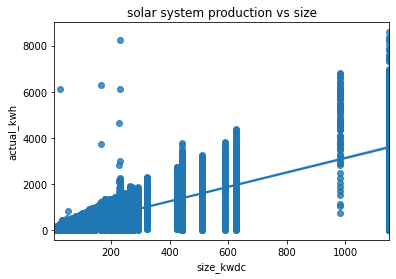

In [16]:
sns.regplot(df['size_kwdc'], df['actual_kwh'])
plt.title('solar system production vs size')
plt.show()

Plotting size against production directly, we do see that the bigger systems have higher max production values compared to smaller ones. However, the variance is also higher. The trend is that production does increase with size, as we would expect. Some smaller contracts also occasionally produce very high power (potentially anomalous, but we can examine this later with specific yield).

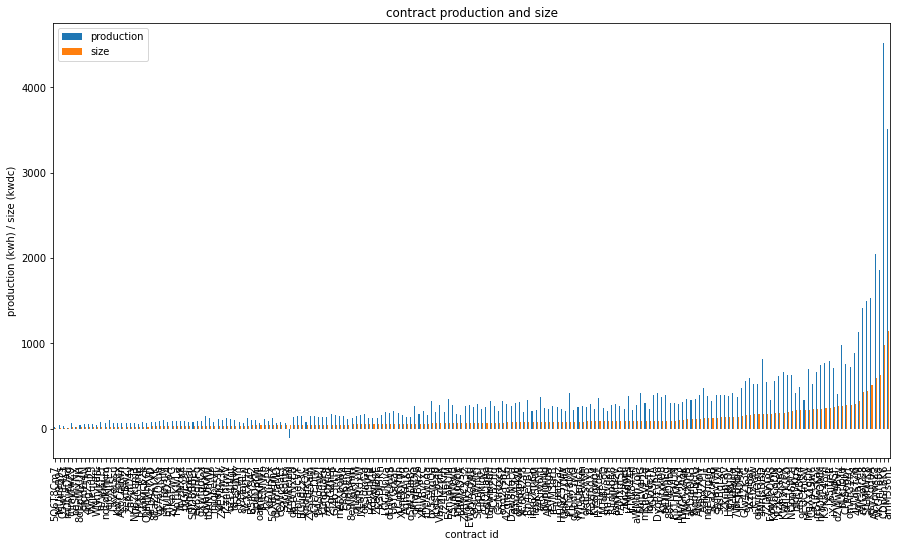

In [17]:
# plot each contract's size versus average (daily) production for comparison (same axes)

df_size_production = pd.DataFrame() # combine to a new dataframe to plot using pandas
df_size_production['production'] = pd.Series(avg_contract_production) # cast production dict as series and add column
df_size_production['size'] = size_unique # size is already a series from earlier, so just add it
df_size_production.sort_values(by = 'size').plot(kind = 'bar', figsize = (15, 8))
plt.title('contract production and size')
plt.xlabel('contract id')
plt.ylabel('production (kwh) / size (kwdc)')
plt.show()

Plotted individually by contract, again, size corresponds with average production. Next, we will examine both of these variables alongside specific yield.

#### 2.3.16 Yield

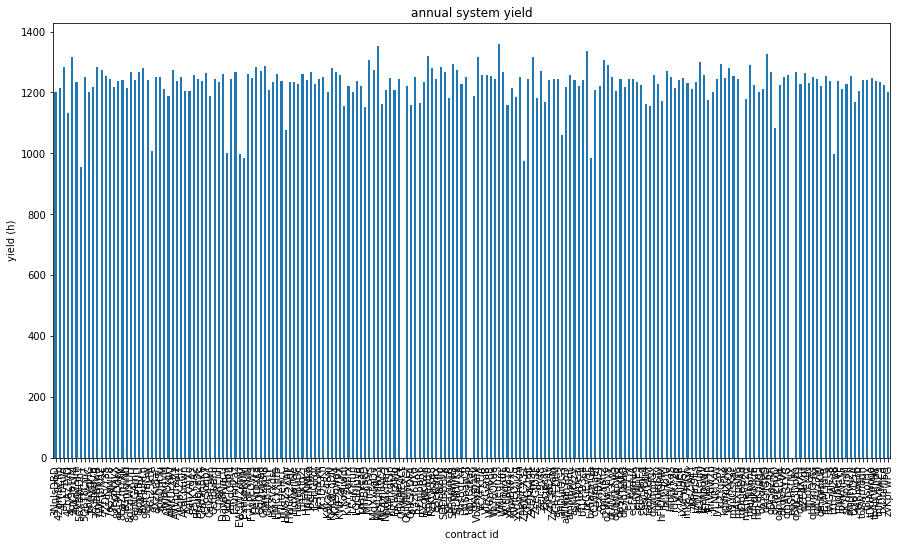

In [18]:
# plot system yield by contract

annual_yield = df.groupby(['contract_id']).mean()['system_yield_as_built']
annual_yield.plot(kind = 'bar', figsize = (15, 8))
plt.title('annual system yield')
plt.xlabel('contract id')
plt.ylabel('yield (h)')
plt.show()

At a glance, annual yield as provided in the dataset seems very evenly distributed. Since this is something we can also calculate on our own given that we have data for both production and size, we can do so and see if our self-calculated yield matches the one provided.

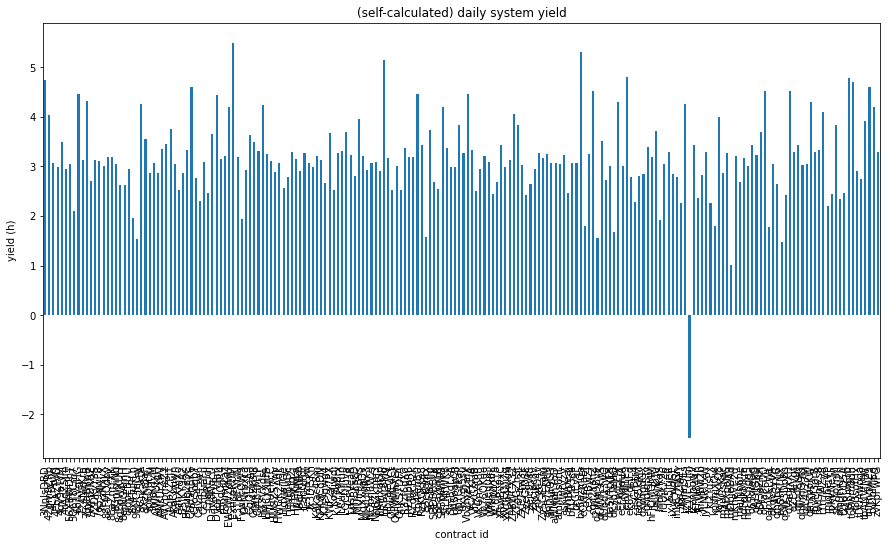

In [19]:
# find and plot ratios of production per size (calculated yield)

df_size_production['yield'] = pd.Series(avg_contract_production)/size_unique # new column to dataframe
df_size_production['yield'].plot(kind = 'bar', figsize = (15, 8))
plt.title('(self-calculated) daily system yield')
plt.xlabel('contract id')
plt.ylabel('yield (h)')
plt.show()

The self-calculated specific yield ratios, while still relatively random at a glance, seem to have a much higher variance than the ones provided. This could be due to random variations in production, or it could be a sign that some provided data are off.

In [20]:
# create new columns for annual yield and daily yield to compare to the self-calculated one

df_size_production['annual yield'] = annual_yield
df_size_production['daily yield'] = annual_yield/365

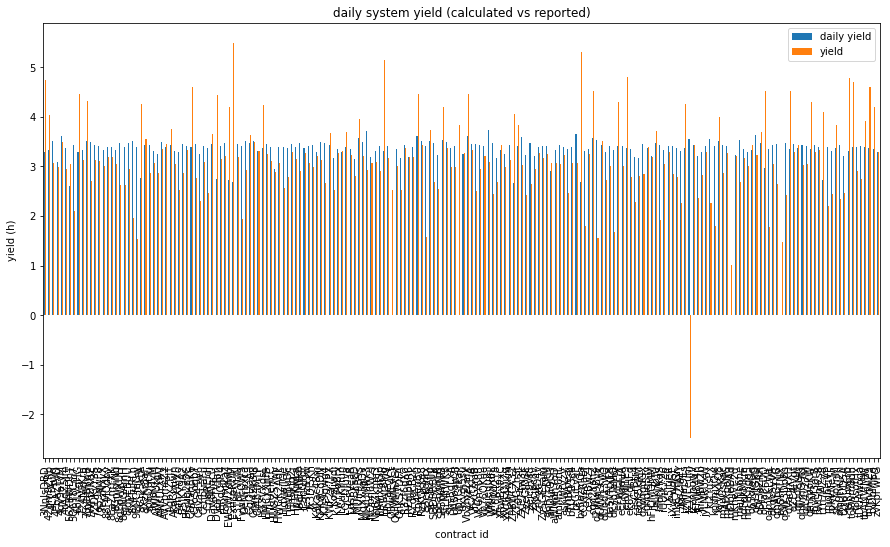

In [21]:
# plot calculated against provided daily yield to notice correspondence

df_size_production[['daily yield', 'yield']].plot(kind = 'bar', figsize = (15, 8))
plt.title('daily system yield (calculated vs reported)')
plt.xlabel('contract id')
plt.ylabel('yield (h)')
plt.show()

Plotting calculated yield against provided yield, we can see that there are some gaps in the provided yield plot where there is data for calculated yield. That is, some of the expected yields are 0 where systems are actually producing. This likley means these provided yields are off. We can examine provided vs calculated specific yields in more detail below.

In [22]:
# (provided daily yield, number of contracts with that yield)

df_size_production['daily yield'].value_counts()

0.000000    4
3.405753    3
3.446575    3
3.408219    3
3.394521    3
           ..
3.441644    1
3.165479    1
3.345205    1
3.293151    1
3.294247    1
Name: daily yield, Length: 169, dtype: int64

In [23]:
# (calculated daily yield, number of contracts with that yield)

df_size_production['yield'].value_counts()

4.739391    1
4.302328    1
3.069080    1
5.299599    1
1.795675    1
           ..
2.521551    1
3.272230    1
3.307718    1
3.698247    1
3.301824    1
Name: yield, Length: 200, dtype: int64

In [24]:
# check if any of the contracts have a calculated yield of 0 (e.g. never produced)

df_size_production['yield'][df_size_production['yield'] == 0]

Series([], Name: yield, dtype: float64)

Again, it is slightly concerning that there are 4 systems for which the reported yield is 0 and 30 for which no yield is reported. It is also a bit strange why some contracts have the same specific yield, down to 6 decimal points. In comparison, our self-calculated specific yields are unique, exist for all contracts (except the one removed earlier), and contain no zeroes. 

In [25]:
# (mean provided daily yield, mean calculated daily yield)

np.mean(df_size_production['daily yield']), np.mean(df_size_production['yield'])

(3.2944576712328746, 3.147552023792282)

Interestingly, too, the average daily yield as averaged using the provided yield is higher than the one averaged using our self-calculated yield, despite the provided data containing zeroes. Further, provided yield is 'system_yield_as_built', the engineering as opposed to finance value, so it's more problematic for it to be inflated or potentially inaccurate. Still, out self-calculated yield may also have problems as production values used to calculate them can fluctuate and throw our calculations off. Since we're not sure which yield is more accurate, we will plot both against production and size to see if there are any trends or correlations between them.

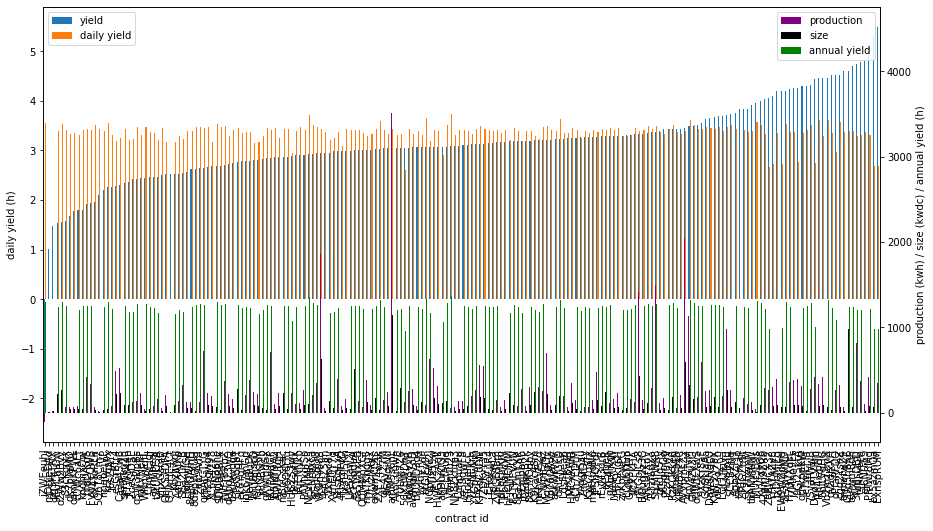

In [26]:
# bar plot sorted by self-calculated yield

ax = df_size_production.sort_values(by = 'yield')[['yield', 'daily yield']].plot(kind = 'bar', figsize = (15, 8))
ax.set_xlabel("contract id")
ax.set_ylabel("daily yield (h)")
ax2 = ax.twinx()
df_size_production.sort_values(by = 'yield')[['production', 'size', 'annual yield']].plot(kind = 'bar', \
figsize = (15, 8), ax = ax2, color = ['purple', 'black', 'green'])
ax2.set_ylabel("production (kwh) / size (kwdc) / annual yield (h)")
ax2.legend(loc='upper right')
plt.show()

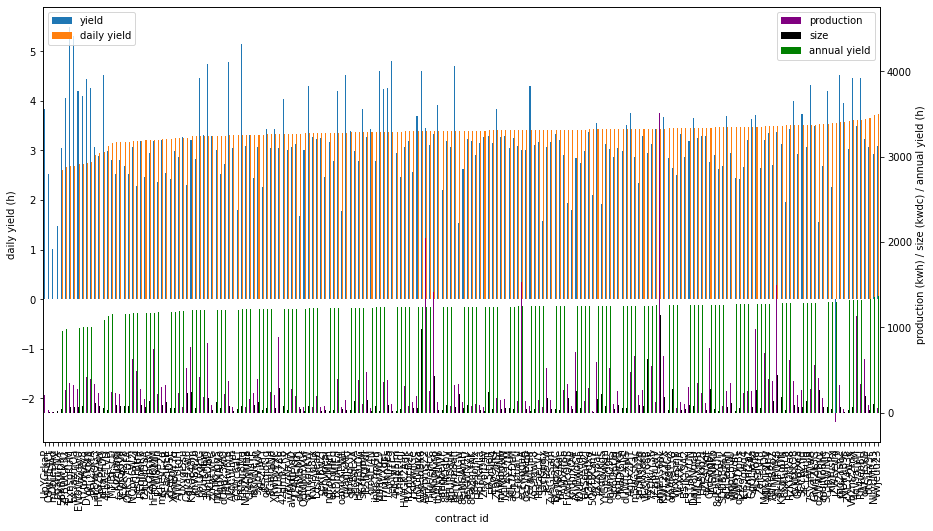

In [27]:
# bar plot sorted by provided yield

ax = df_size_production.sort_values(by = 'daily yield')[['yield', 'daily yield']].plot(kind = 'bar', figsize = (15, 8))
ax.set_xlabel("contract id")
ax.set_ylabel("daily yield (h)")
ax.legend(loc='upper left')
ax2 = ax.twinx()
df_size_production.sort_values(by = 'daily yield')[['production', 'size', 'annual yield']].plot(kind = 'bar', \
figsize = (15, 8), ax = ax2, color = ['purple', 'black', 'green'])
ax2.set_ylabel("production (kwh) / size (kwdc) / annual yield (h)")
ax2.legend(loc='upper right')
plt.show()

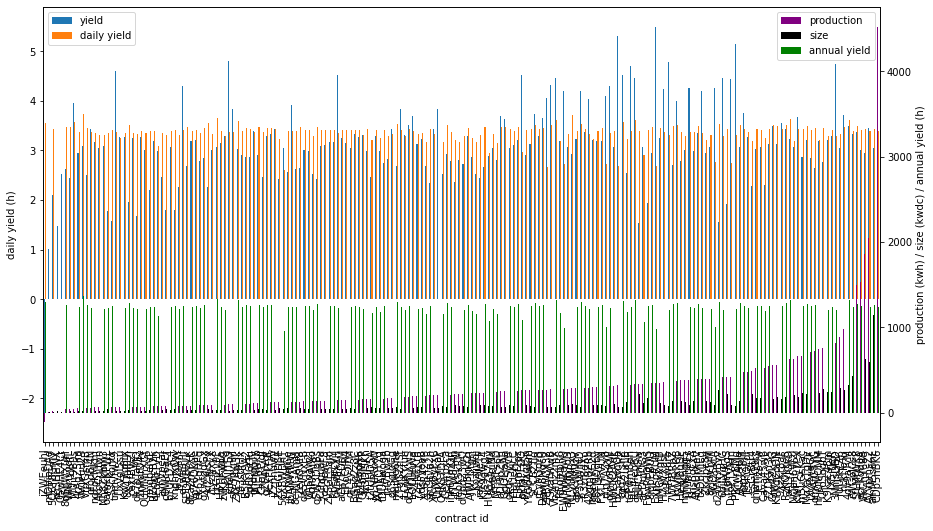

In [28]:
# bar plot sorted by production

ax = df_size_production.sort_values(by = 'production')[['yield', 'daily yield']].plot(kind = 'bar', figsize = (15, 8))
ax.set_xlabel("contract id")
ax.set_ylabel("daily yield (h)")
ax.legend(loc='upper left')
ax2 = ax.twinx()
df_size_production.sort_values(by = 'production')[['production', 'size', 'annual yield']].plot(kind = 'bar', \
figsize = (15, 8), ax = ax2, color = ['purple', 'black', 'green'])
ax2.set_ylabel("production (kwh) / size (kwdc) / annual yield (h)")
ax2.legend(loc='upper right')
plt.show()

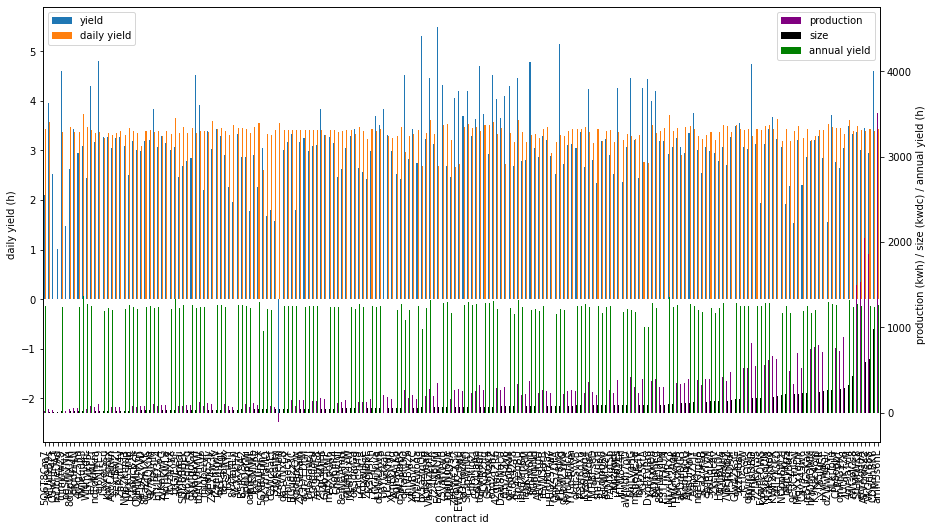

In [29]:
# bar plot sorted by system size

ax = df_size_production.sort_values(by = 'size')[['yield', 'daily yield']].plot(kind = 'bar', figsize = (15, 8))
ax.set_xlabel("contract id")
ax.set_ylabel("daily yield (h)")
ax.legend(loc='upper left')
ax2 = ax.twinx()
df_size_production.sort_values(by = 'size')[['production', 'size', 'annual yield']].plot(kind = 'bar', \
figsize = (15, 8), ax = ax2, color = ['purple', 'black', 'green'])
ax2.set_ylabel("production (kwh) / size (kwdc) / annual yield (h)")
ax2.legend(loc='upper right')
plt.show()

Just observing the series of graphs above, we can see that while size varies with production (they appear highly correlated), varying any measure of yield leads to a pretty random distribution of size and production. Varying size or production doesn't seem to produce any trend in yield. Thus, there doesn't seem to be much correlation, if any, between size / production and yield. We can also measure the exact correlations and see.

In [30]:
df_size_production.corr()

,production,size,yield,annual yield,daily yield
production,1.000000,0.968085,0.188340,0.089184,0.089184
size,0.968085,1.000000,0.048678,0.105240,0.105240
yield,0.188340,0.048678,1.000000,0.075914,0.075914
annual yield,0.089184,0.105240,0.075914,1.000000,1.000000
daily yield,0.089184,0.105240,0.075914,1.000000,1.000000


From the correlation matrix, we see that there is, indeed, a very high correlation between size and (average) production! However, as expected, there is relatively little correlation between either and yield (provided or calculated). There is perhaps some correlation between production and calculated yield, but, after all, this yield is calculated using average daily production divided by size. It's actually surprising how low the correlation is between calculated yield and size, given that it's in the denominator of our calculation. That said, again, none of these correlations between production or size and any measure of yield is high enough to assume a real relationship. Neither does calculated yield correspond very much with provided yield, which is interesting to note. It might be interesting to also check if any other factors do vary with yield, as we want yield to be as high as possible.

In [31]:
dict_yield = dict(df_size_production['yield'])
df['yield'] = df.apply(lambda row: dict_yield[row.contract_id], axis=1)
df.corr()['yield']

holding_company_id              -0.173470
project_company_id              -0.114365
size_kwdc                        0.084669
actual_kwh                       0.145050
expected_kwh                     0.090627
weather_adjusted_expected_kwh    0.092225
system_yield_as_built            0.118675
system_yield_finance             0.122196
annual_degradation_engr               NaN
annual_degradation_finance      -0.119631
yield                            1.000000
Name: yield, dtype: float64

In [32]:
df.corr()['system_yield_as_built']

holding_company_id              -0.116648
project_company_id              -0.103594
size_kwdc                        0.130345
actual_kwh                       0.099689
expected_kwh                     0.135918
weather_adjusted_expected_kwh    0.133491
system_yield_as_built            1.000000
system_yield_finance             0.955947
annual_degradation_engr               NaN
annual_degradation_finance      -0.243101
yield                            0.118675
Name: system_yield_as_built, dtype: float64

Looking at a more complete list of correlations, again, nothing seems to correlate strongly or even moderately with either measure of yield, provided or calculated.

#### 2.3.2 Holding Company

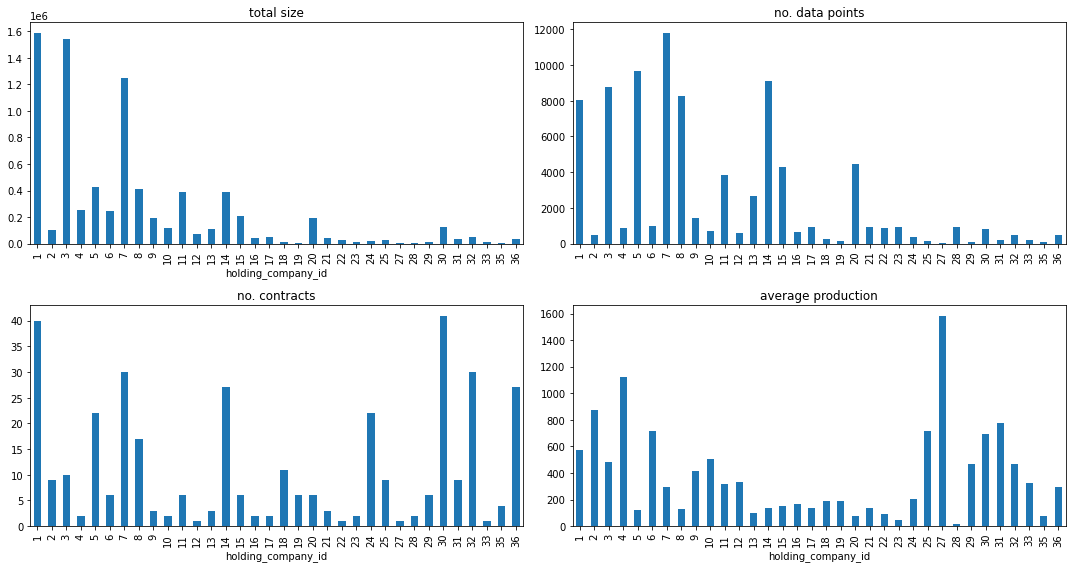

In [33]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# plot total solar system size under each holding company
df.groupby(['holding_company_id']).sum()['size_kwdc'].plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 0], \
title = 'total size')

# plot number of datapoints per holding company
df['holding_company_id'].value_counts().sort_index().plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 1], \
title = 'no. data points')

# plot number of contracts under each holding company
df.groupby('holding_company_id')['contract_id'].unique().str.len().plot(kind = 'bar', figsize = (15, 8), \
ax = axes[1, 0], title = 'no. contracts')

# plot average production under each holding company
df.groupby(['holding_company_id']).mean()['actual_kwh'].plot(kind = 'bar', figsize = (15, 8), ax = axes[1, 1], \
title = 'average production')

plt.tight_layout()

Examining the 'holding_company_id' column, we find that contracts, total system size, and amount of data are all pretty unevenly distributed between holding companies. So is average production. This finding, itself, is not surprising, but the discrepancy between the measures may be interesting to note.

For example, holding company 3 may not have many contracts, but they have a large mass of solar system which produces a lot of data. In terms of production, relatively middling. Company 1 has many large systems which collect a lot of data, but again, middling production. Companies 5, 7, 8, and 14, which, based on size, no. contracts, and no. data points, I would also call "bigger" companies, have relatively low average production.

Companies with relatively high average production, like 2, 4, 6, 25, 27, 30, 31 all have relatively little data and smaller aggregate system size. Among them, only 30 has many contracts (albeit still small ones). On the surface (in terms of size, no. contracts, amount of data), they look similar to company 21, which has net negative production. This may just mean that there's more variability among smaller companies, but the average production among smaller companies does appear potentially higher than among bigger companies.

#### 2.3.2 Project Company

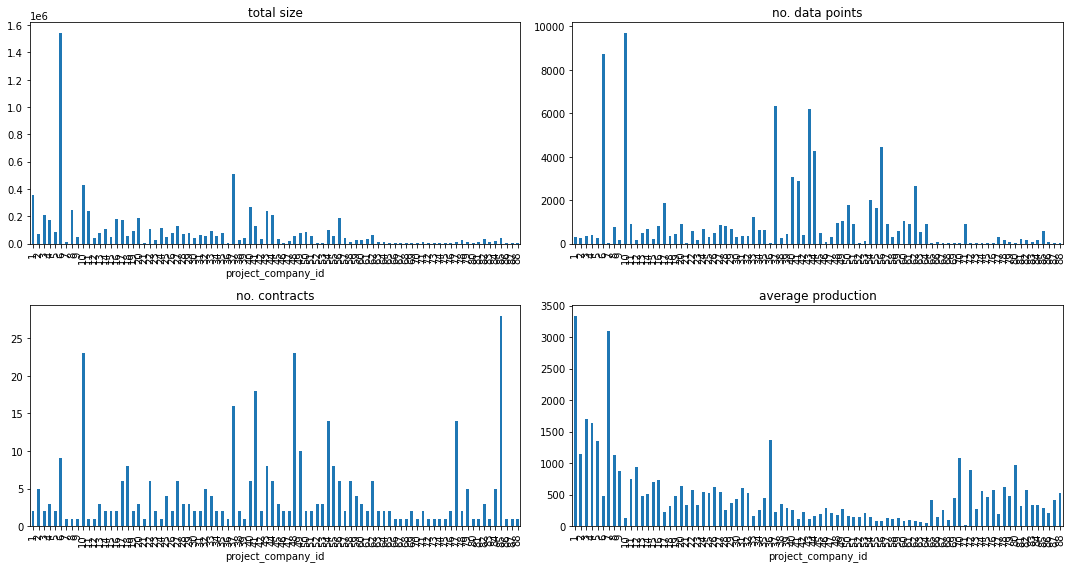

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# plot total solar system size under each project company
df.groupby(['project_company_id']).sum()['size_kwdc'].plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 0], \
title = 'total size')

# plot number of datapoints per project company
df['project_company_id'].value_counts().sort_index().plot(kind = 'bar', figsize = (15, 8), ax = axes[0, 1], \
title = 'no. data points')

# plot number of contracts under each project company
df.groupby('project_company_id')['contract_id'].unique().str.len().plot(kind = 'bar', figsize = (15, 8), \
ax = axes[1, 0], title = 'no. contracts')

# plot average production under each project company
df.groupby(['project_company_id']).mean()['actual_kwh'].plot(kind = 'bar', figsize = (15, 8), ax = axes[1, 1], \
title = 'average production')

plt.tight_layout()

For project companies, company 1 has notably very high average production despite low aggregate size, number of contracts, and amount of data. Same for companies 3, 4, 5, 7 and 36. Company 57, with negative average production, is also small by all other metrics.

"Big" companies (by all metrics), like 6, 10, 37, etc., all have quite low production. 

# probably write more idk

#### 2.3.4 Contract ID

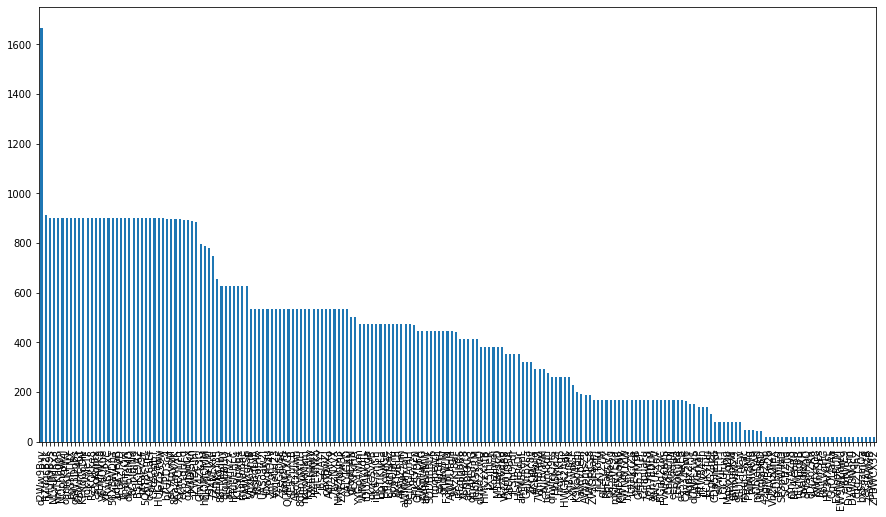

In [35]:
# plot how much data we have from each contract

contracts = df['contract_id'].value_counts() # count data points per contract and store it
contracts.plot(kind = 'bar', figsize = (15, 8))

Examining a simple count of contract IDs, we find many modes - 899 makes sense because data started being collected only on Jan 1, 2019 (899 days before this dataset was extracted), but others may be abnormal. And, since data was only collected from Jan 1, 2019, the contract with almost double that likely contains duplicates or faulty data. The same applies to the other contract with slightly more than 899 data points.

In [36]:
# frequency of number of data points (no. data points, no. contracts with that many data points)

contracts.value_counts()[contracts.value_counts() > 1]

899    28
18     27
169    22
535    22
475    12
444     9
79      7
626     7
383     6
414     5
261     4
353     4
49      3
291     3
138     3
322     3
898     3
186     2
44      2
891     2
534     2
153     2
504     2
Name: contract_id, dtype: int64

In [37]:
# use this cell to filter for common contract start dates vs ato dates vs service dates

for elem in contracts[contracts == 383].index:
    print(df[df['contract_id'] == elem][['production_date', 'ato_date', 'in_service_date']])

      production_date   ato_date in_service_date
29345      2021-08-04 2020-05-11      2020-05-11
29457      2021-08-04 2020-05-11      2020-05-11
29570      2021-08-04 2020-05-11      2020-05-11
29683      2021-08-04 2020-05-11      2020-05-11
29796      2021-08-04 2020-05-11      2020-05-11
...               ...        ...             ...
83272      2021-08-04 2020-05-11      2020-05-11
83472      2021-08-04 2020-05-11      2020-05-11
83672      2021-08-04 2020-05-11      2020-05-11
83872      2021-08-04 2020-05-11      2020-05-11
84072      2021-08-04 2020-05-11      2020-05-11

[383 rows x 3 columns]
      production_date   ato_date in_service_date
29356      2021-08-04 2020-05-14      2020-05-14
29469      2021-08-04 2020-05-14      2020-05-14
29582      2021-08-04 2020-05-14      2020-05-14
29695      2021-08-04 2020-05-14      2020-05-14
29808      2021-08-04 2020-05-14      2020-05-14
...               ...        ...             ...
83300      2021-08-04 2020-05-14      2020-05

As we can see, there are a number of contracts which only started collecting data on 6/1/2021, 1/1/2021, 1/1/2021, 3/1/2020, 4/1/2020, 4/1/2021, 10/1/2019, 6/1/2020, etc. (in order of frequency) regardless of their ato or in service dates. This likely means they are missing data (there is a gap between the in service date and the actual first production date when we started collecting data). Further, some in-service dates seem to be after our first production date, which shouldn't be the case. Likely these in-service dates are inaccurate.

In [38]:
# find exact discrepancies between in service dates and ato dates

group = df.groupby('contract_id') # group data by contract
ato_unique = group.apply(lambda x: x['ato_date'].unique()[0]) # get a series of ato dates for each contract
inservice_unique = group.apply(lambda x: x['in_service_date'].unique()[0]) # and in-service dates
first_production = group.apply(lambda x: x['production_date'].unique()[0]) # get first registered production date

diff = pd.DataFrame() # dataframe to store differences and spot discrepancies
diff['inservice - ato'] = inservice_unique - ato_unique
diff['production - ato'] = first_production - ato_unique
diff['production - inservice'] = first_production - inservice_unique
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(diff)

            inservice - ato production - ato production - inservice
contract_id                                                        
3NnJsDBD             0 days         168 days               168 days
42gm9ZRb             0 days          82 days                82 days
4CLfAuJq             1 days         358 days               357 days
4FbAzTVD             5 days         979 days               974 days
4qv9aTyM             0 days         854 days               854 days
4rAgZ5Jm            12 days         528 days               516 days
56XBWDhT          -146 days        1041 days              1187 days
5Q6T8Cm7             0 days         980 days               980 days
6bjLVgHG             0 days          82 days                82 days
724NEKrh           -16 days         824 days               840 days
7SyafWwB             0 days          79 days                79 days
7WFfBRbZ             0 days         338 days               338 days
7ZDKyY35            -1 days         715 days    

As we can see, indeed, in-service dates are a bit inconsistent. We should not see negative values in the dataframe above, but we do, meaning some in-service dates are listed as earlier than the ato dates (which would be illegal if not impossible as you can't turn the system on before you've built it and gotten it approved), and some in-service dates are listed as after the first production day for which we have data (meaning we have 'ghost' data from before the system was turned on). However, there are no negatives in the second column above, meaning ato dates are consistently earlier than starting production dates. As such, ato dates are likely accurate and can be used to replace any negative (e.g. wrong) in-service dates.

Further, there are some contracts where the in-service date is long after the ato date, which might be interesting to flag and look into.

In [39]:
# find any problematic contracts w/ wrong in-service dates

problematic = []
for contract in contracts.index:
    if diff['production - inservice'][contract].days < 0 or diff['inservice - ato'][contract].days < 0:
        problematic.append(contract)
        
print(problematic)

['d2Ww9Bvv', 'KPKdCoDN', '56XBWDhT', 'btGiEv9F', '724NEKrh', '7ZDKyY35', 'ETumf2az', 'F3THFVUN']


In [40]:
# replace problematic in service dates

for i in df.index:
    if df['contract_id'][i] in problematic:
        df['in_service_date'][i] = df['ato_date'][i]

/Users/katherineli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [41]:
# flag any contracts for which in-service date is way after ato date (perhaps unreasonably so)

late_inservice = list(diff[diff['inservice - ato'].apply(lambda x: x.days) > 30].index)
print(late_inservice)

['8dEpWXUH', 'HUGZ57wv', 'HpTiKwLa', 'LCuKYfun', 'QUMMnXGf', 'RzKQkke8', 'S3cKontx', 'UASoaw2J', 'VfjxGsmB', 'XRwBvPxC', 'cQWc6aEf', 'dk7bTaMQ', 'ek6YqHFq', 'gXwfgdGx', 'hFjQMQMM', 'oamkKPWL', 'qfodEj4N']


Now that we have (most likely) accurate in-service dates, we can start to flag and deal with discrepancies in data collection, e.g. differences between age and number of production days.

In [42]:
# find any discrepancies between recorded ages of each contract (from in service date to today) and data points
# (there should be one data point per day, but most don't match)

group = df.groupby('contract_id') # update grouped dataframe since we changed the main one
inservice_fixed = group.apply(lambda x: x['in_service_date'].unique()[0]) # update in service dates
system_age = pd.to_datetime(datetime.date.today()) - inservice_fixed # age = difference from today
pseudo_age = pd.Series() # psuedo ages bc some older contracts only started collecting data on Jan 1 2019
for contract in contracts.index: # set any contracts w/ ato date before Jan 1 2019 to 899 days old
    if inservice_fixed[contract] < pd.to_datetime(datetime.date(2019, 1, 1)):
        pseudo_age[contract] = pd.to_datetime(datetime.date(2021, 6, 18)) - pd.to_datetime(datetime.date(2019, 1, 1))
    else:
        pseudo_age[contract] = system_age[contract]
        
differences = {} # create a dictionary to store differences between age and datapoints per contract (above)

print("Contract \t Age \t Count \t Difference")
for i in range(len(pseudo_age)):
    print(f"{pseudo_age.index[i]} \t {pseudo_age[i].days} \t {contracts[pseudo_age.index[i]]} \t \
{contracts[pseudo_age.index[i]] - pseudo_age[i].days}")
    differences[pseudo_age.index[i]] = contracts[pseudo_age.index[i]] - pseudo_age[i].days

Contract 	 Age 	 Count 	 Difference
d2Ww9Bvv 	 899 	 1668 	 769
RZdqcB2k 	 899 	 912 	 13
MUir9B9s 	 899 	 899 	 0
NLvUMRx3 	 899 	 899 	 0
nmTKhgg5 	 899 	 899 	 0
NQpn6W2J 	 899 	 899 	 0
oamkKPWL 	 940 	 899 	 -41
pgSHiTNX 	 899 	 899 	 0
q5W3DpBs 	 899 	 899 	 0
Q5wHE4Ct 	 899 	 899 	 0
KPKdCoDN 	 899 	 899 	 0
rokVNeTF 	 899 	 899 	 0
RzKQkke8 	 899 	 899 	 0
S3cKontx 	 922 	 899 	 -23
SfLMfWK8 	 899 	 899 	 0
Vp76QKue 	 899 	 899 	 0
XRwBvPxC 	 899 	 899 	 0
56XBWDhT 	 899 	 899 	 0
LdsFVeaB 	 899 	 899 	 0
4FbAzTVD 	 899 	 899 	 0
kndhjxQw 	 899 	 899 	 0
dk7bTaMQ 	 899 	 899 	 0
8GniqiNd 	 899 	 899 	 0
B5JKY9A2 	 899 	 899 	 0
btGiEv9F 	 899 	 899 	 0
5Q6T8Cm7 	 899 	 899 	 0
cQWc6aEf 	 899 	 899 	 0
CPoSogbT 	 899 	 899 	 0
HUGZ57wv 	 899 	 899 	 0
JeTiz59w 	 899 	 899 	 0
bTUPD3c4 	 899 	 898 	 -1
sK7fpynM 	 899 	 898 	 -1
8EaZmYXK 	 899 	 898 	 -1
XVnEQY7q 	 899 	 897 	 -2
ek6YqHFq 	 897 	 891 	 -6
gXwfgdGx 	 899 	 891 	 -8
Jx3DJ5Kn 	 899 	 887 	 -12
jZWEeuhJ 	 899 	 886 	 

/Users/katherineli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [43]:
# count how many contracts have no discrepancies (difference of 0 days between in service and production)

sum(d == 0 for d in differences.values())

26

After counting the number of data points per contract, we want to compare to the number we expect based on the age of each solar system. We calculate this by subtracting the in service date from the date on which this dataset was extracted. As we see above, there are many discrepancies - only 35 out of 200 contracts have the expected number of datapoints! However, most of these values are negative, meaning we have a lot of missing data (as opposed to extra / likely duplicated data). It might be interesting to see just how much data we're missing.

In [44]:
# sum the total number of days for which data seems to be missing

missingtotal = sum(sorted(differences.values())[:157])
print(missingtotal)
np.abs(missingtotal/(len(df.index) + missingtotal)) # as a percentage

-11755


0.16236636371170474

As we can see, we're missing a hefty portion of our data. For now, we will leave the missing data be.

# probably come back to this and figure out how to deal with it - ema??

Next, we're also interested in the contracts with too much data, because we might have duplicates there.

In [45]:
# find any contracts with too much data (more than one per day since it went into service)

pd.Series(differences)[pd.Series(differences) > 0]

d2Ww9Bvv    769
RZdqcB2k     13
hFjQMQMM    272
VfjxGsmB     15
UASoaw2J     12
QUMMnXGf     19
8dEpWXUH     29
t6Pwm8dh     58
dtype: int64

In [46]:
# use this cell to examine contracts with potential duplicates listed above

df[df['contract_id'] == 't6Pwm8dh']['production_date'][df[df['contract_id'] == 't6Pwm8dh']\
['production_date'].duplicated()]

55955   2021-08-04
56114   2021-08-04
56273   2021-08-04
56432   2021-08-04
56591   2021-08-04
           ...    
83387   2021-08-04
83587   2021-08-04
83787   2021-08-04
83987   2021-08-04
84187   2021-08-04
Name: production_date, Length: 275, dtype: datetime64[ns]

Indeed, all of the contracts with too much data do have duplicates. Interestingly, some of them are also missing data - the latter two. There might be other contracts with both duplicates and missing data that just cancel to 0, so we'll check all contracts for duplicate production dates. We'll also check some of the general characteristics of these contracts (those with duplicates).

In [47]:
for contract in contracts.index:
    if group.apply(lambda x: x['production_date'])[contract].duplicated().any():
        print(contract)

d2Ww9Bvv
RZdqcB2k
MUir9B9s
NLvUMRx3
nmTKhgg5
NQpn6W2J
oamkKPWL
pgSHiTNX
q5W3DpBs
Q5wHE4Ct
KPKdCoDN
rokVNeTF
RzKQkke8
S3cKontx
SfLMfWK8
Vp76QKue
XRwBvPxC
56XBWDhT
LdsFVeaB
4FbAzTVD
kndhjxQw
dk7bTaMQ
8GniqiNd
B5JKY9A2
btGiEv9F
5Q6T8Cm7
cQWc6aEf
CPoSogbT
HUGZ57wv
JeTiz59w
bTUPD3c4
sK7fpynM
8EaZmYXK
XVnEQY7q
ek6YqHFq
gXwfgdGx
Jx3DJ5Kn
jZWEeuhJ
Giw4Zk3G
hFjQMQMM
4qv9aTyM
724NEKrh
7ZDKyY35
88FMQdby
8iqpEBUU
askWfVzV
HTuUeHcC
KTs9gwg4
mujNo6he
PAMxgfSp
VfjxGsmB
ShsBqLxA
t83sofHx
UASoaw2J
Uxvgi5su
ZnPofD4v
Vwjeuu23
ZceGJDSE
Zeic9Vf8
QUMMnXGf
SEa2urLB
AkoCuuwn
8dEpWXUH
ndFokMkm
KwY7q8rx
jZznhuwV
JAjENNkb
j6sZiAYY
cexfBwZJ
AqhXAjXo
7tyzNxyX
Nh8Zkhm3
ZXE74w3k
oALYJGkD
qfodEj4N
VcXFkFiA
YYGp4wkm
WNnyydfL
tDUAwoqa
okqcSvVB
ihk67mGn
HpTiKwLa
HdxwiJGe
ETumf2az
9p6Q6tTu
8x4TuRLh
4rAgZ5Jm
aWMdh7oD
8ejNGAmH
sm9tvu2n
QnKS7DFA
zvKpFwPG
tbANVfMW
SDDBBBLk
rmqbeiVP
esGrBtr4
ghdiq5Ty
F3THFVUN
AJWPUtgH
9XzKr8aF
REqJpbR6
XC6R42Y8
aPDuiQG3
omAfGTYG
febK5kRM
dUbd23wQ
HMCxXnfB
iX5jtjeR
KozJjwdj
MTiBFscD
R3zf6dXo
V

In [48]:
# use this cell to filter dataframe for problematic contracts and examine them individually

df[df['contract_id'] == 'd2Ww9Bvv']

,holding_company_id,project_company_id,contract_id,size_kwdc,production_date,ato_date,actual_kwh,expected_kwh,weather_adjusted_expected_kwh,in_service_date,...,revenue_type,interconnection_type,registry_facility_name,cref_short_name,subscriber_orginization,system_yield_as_built,system_yield_finance,annual_degradation_engr,annual_degradation_finance,yield
10,3,6,d2Ww9Bvv,259.8,2021-08-04,2018-08-01,216.092,486.384821,486.384821,2018-08-01,...,NaN,NEM,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1.563873
48,3,6,d2Ww9Bvv,259.8,2021-08-04,2018-08-01,104.560,486.384821,486.384821,2018-08-01,...,NaN,NEM,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1.563873
49,3,6,d2Ww9Bvv,259.8,2021-08-04,2018-08-01,52.417,486.384821,486.384821,2018-08-01,...,NaN,NEM,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1.563873
87,3,6,d2Ww9Bvv,259.8,2021-08-04,2018-08-01,171.890,486.384821,486.384821,2018-08-01,...,NaN,NEM,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1.563873
88,3,6,d2Ww9Bvv,259.8,2021-08-04,2018-08-01,87.335,486.384821,486.384821,2018-08-01,...,NaN,NEM,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1.563873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83268,25,49,d2Ww9Bvv,259.8,2021-08-04,2018-08-01,1243.604,1233.297307,1233.297307,2018-08-01,...,NaN,NEM,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1.563873
83468,25,49,d2Ww9Bvv,259.8,2021-08-04,2018-08-01,1235.754,1233.297307,1233.297307,2018-08-01,...,NaN,NEM,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1.563873
83668,25,49,d2Ww9Bvv,259.8,2021-08-04,2018-08-01,1421.949,1233.297307,1233.297307,2018-08-01,...,NaN,NEM,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1.563873
83868,25,49,d2Ww9Bvv,259.8,2021-08-04,2018-08-01,1497.225,1233.297307,1233.297307,2018-08-01,...,NaN,NEM,NaN,NaN,NaN,1291.8,1240.1,0.005,NaN,1.563873


Next, rows with duplicated production dates should be removed. With duplicated production dates, they seem to be mismatched on created_on and actual_kwh, with earlier (presumably non-updated) created_on dates corresponding to higher actual_kwh readings. These earlier readings will be deleted and only more recent created_on data will be maintained.

In [49]:
# delete duplicated data
duplicated = ['RZdqcB2k', 'Giw4Zk3G', 't6Pwm8dh', 'hFjQMQMM', 'd2Ww9Bvv']

for contract in duplicated:
    duplicates = df[df['contract_id'] == contract]['production_date']
    df.drop(duplicates[duplicates.duplicated(keep = 'last')].index, inplace = True)
    
group = df.groupby('contract_id') # re-group data by contract since some rows were deleted

#### 2.3.6 ATO Date

(array([ 4., 17., 18.,  9., 36.,  5., 10.,  7., 26.,  3., 11., 54.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

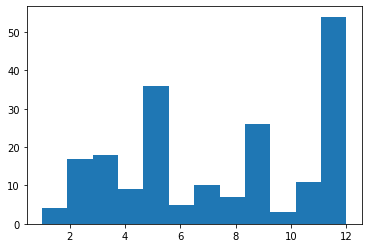

In [50]:
# plot how many systems have been allowed to open each month (total) - to get an idea of monthly trends

ato_month_unique = group.apply(lambda x: x['ato_date'].dt.month.unique()[0])
plt.hist(ato_month_unique, bins = 12)

First, we can plot a histogram of ato dates to see if there is a trend in the month a solar system tends to be created. As we can see, most are created in December as companies rush to meet year-end quotas, and not many are opened in January following. The peak seen in May is likely due to an influx of new contracts this year, May 2021, with our data for 2021 only leading up to mid-June.

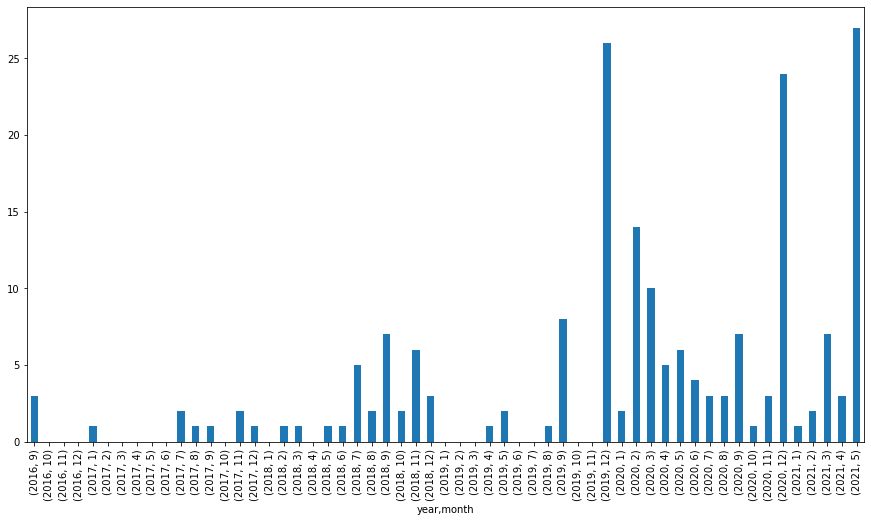

In [51]:
# plot how many systems were approved / completed / ready to open each month since Sep 2016

ato_date_unique = pd.DataFrame() # new dataframe to store data by ato year and month
ato_date_unique['year'] = group.apply(lambda x: x['ato_date'].dt.year.unique()[0]) # columns for year
ato_date_unique['month'] = group.apply(lambda x: x['ato_date'].dt.month.unique()[0]) # and month
ato_date_unique['count'] = 1 # count to keep track
ato_groups = ato_date_unique.groupby([ato_date_unique['year'], ato_date_unique['month']]).count()['count'] 
# count occurrences

# for months with 0 occurences, still add them as indices with values/counts of 0 for the bar plot
year = 2016
month = 9
while year < 2021:
    try:
        ato_groups[(year, month)]
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
    except:
        ato_groups[(year, month)] = 0
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
ato_groups.sort_index(inplace = True)

ato_groups.plot(kind = 'bar', figsize = (15, 8))

Breaking down our ato plot by year as well, we can see that more systems tend to be created each year as the company grows. Systems tend to peak in December, as observed before, and drop significantly for January. The fact that we only have data from September of 2016 may have also inflated the number in the month-only histogram above, causing the peak there. Interestingly, there are some months where no systems are created. Others, very few. However, evident by the peaks, the company must have the capacity to produce new systems quite quickly, making the lows potentially concerning in terms of demand. The peak this May may be due to the big deal with Franklin Park Infrastructure closed earlier this year. Below shows a cumulative plot of total systems over time (as opposed to only new systems created).

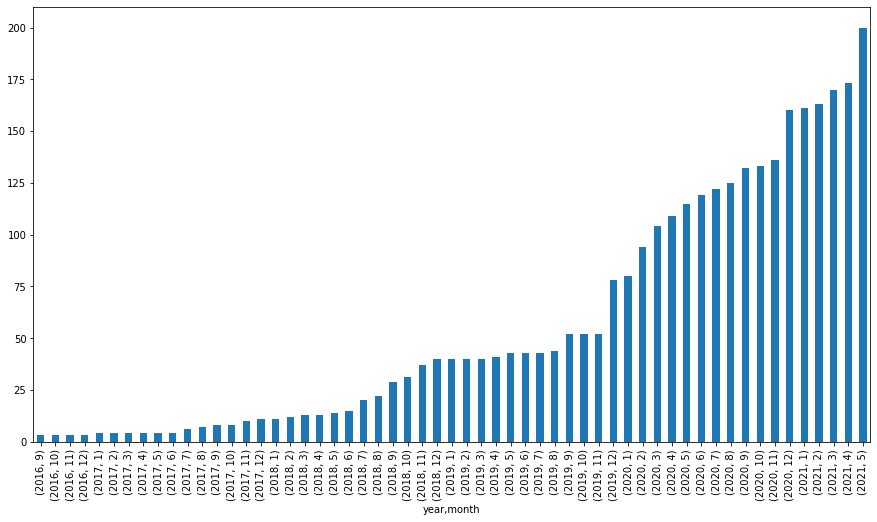

In [52]:
# cumulative number of systems since Sep 2016

ato_groups.cumsum().plot(kind = 'bar', figsize = (15, 8))

We can also try plotting production by ato date to see if systems build or approved at different times yield different results (e.g. if, since so many systems are built in December, they perform better or worse). Since all of the systems have different sizes, we will use the more standardized metric of specific yield (production/kwh per size/kwdc) for comparison.

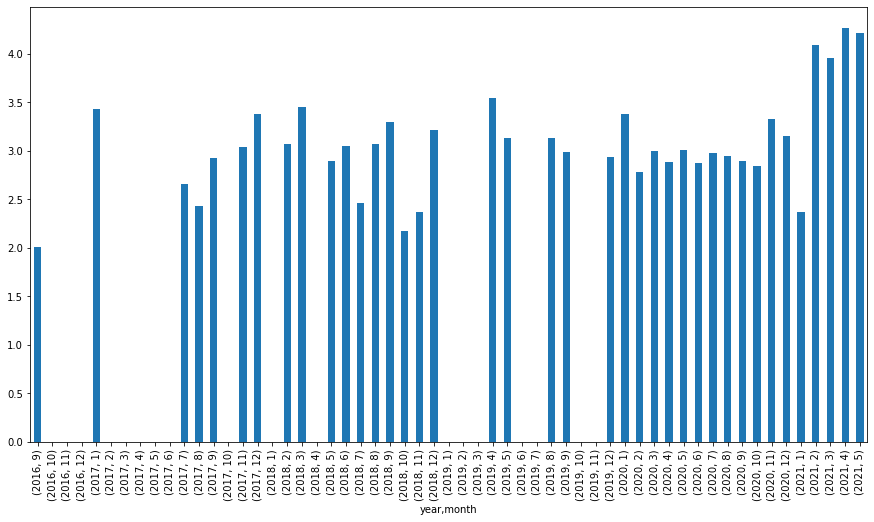

In [53]:
# plot average production of systems built / licensed to open in each month since Sep 2016

df_ato = pd.DataFrame()
df_ato['year'] = group.apply(lambda x: x['ato_date'].dt.year)
df_ato['month'] = group.apply(lambda x: x['ato_date'].dt.month)
df_ato['production'] = group.apply(lambda x: x['actual_kwh'])
df_ato['yield'] = group.apply(lambda x: x['actual_kwh']/x['size_kwdc'])
ato_groups = df_ato.groupby([df_ato['year'], df_ato['month']])
ato_plot = ato_groups.mean()['yield']

year = 2016
month = 9
while year < 2021:
    try:
        ato_plot[(year, month)]
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
    except:
        ato_plot[(year, month)] = 0
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
ato_plot.sort_index(inplace = True)

ato_plot.plot(kind = 'bar', figsize = (15, 8))

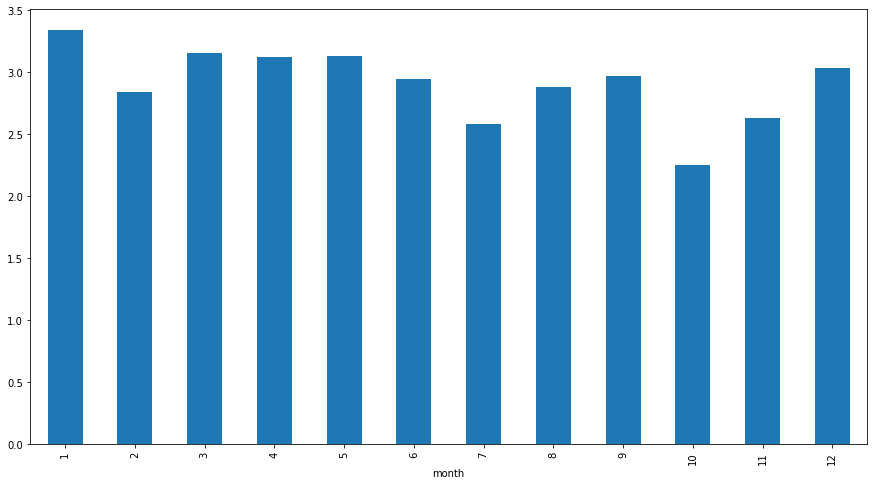

In [54]:
# average production of systems valid to open each month since Sep 2016 (by ato date) disregarding year

ato_month = df_ato.groupby(df_ato['month'])
ato_month.mean()['yield'].plot(kind = 'bar', figsize = (15, 8))

# describe

#### 2.3.7 In-Service Date

(array([15., 14., 28.,  9., 35.,  5.,  7.,  7., 25.,  4.,  8., 43.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

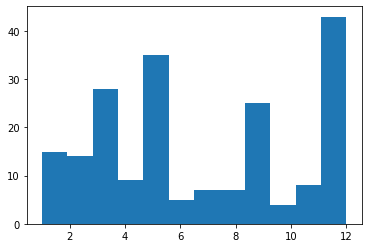

In [55]:
# plot how many systems have actually been opened each month

inservice_month_unique = group.apply(lambda x: x['in_service_date'].dt.month.unique()[0])
plt.hist(inservice_month_unique, bins = 12)

As we can see, the histogram above looks very similar to the one for ATO date and leads to the same conclusions. The same goes for the graphs below.

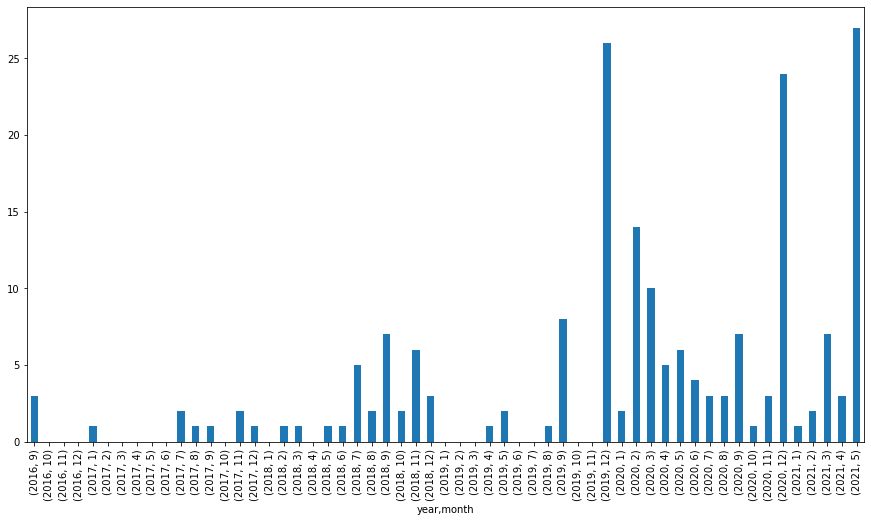

In [56]:
# plot how many systems were actually opened each month since Sep 2016

inservice_date_unique = pd.DataFrame() # new dataframe to store data by in service year and month
inservice_date_unique['year'] = group.apply(lambda x: x['ato_date'].dt.year.unique()[0]) # columns for year
inservice_date_unique['month'] = group.apply(lambda x: x['ato_date'].dt.month.unique()[0]) # and month
inservice_date_unique['count'] = 1 # count to keep track
inservice_groups = inservice_date_unique.groupby([inservice_date_unique['year'], inservice_date_unique['month']])\
.count()['count'] # count occurrences

# for months with 0 occurences, still add them as indices with values/counts of 0 for the bar plot
year = 2016
month = 9
while year < 2021:
    try:
        inservice_groups[(year, month)]
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
    except:
        inservice_groups[(year, month)] = 0
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
inservice_groups.sort_index(inplace = True)

inservice_groups.plot(kind = 'bar', figsize = (15, 8))

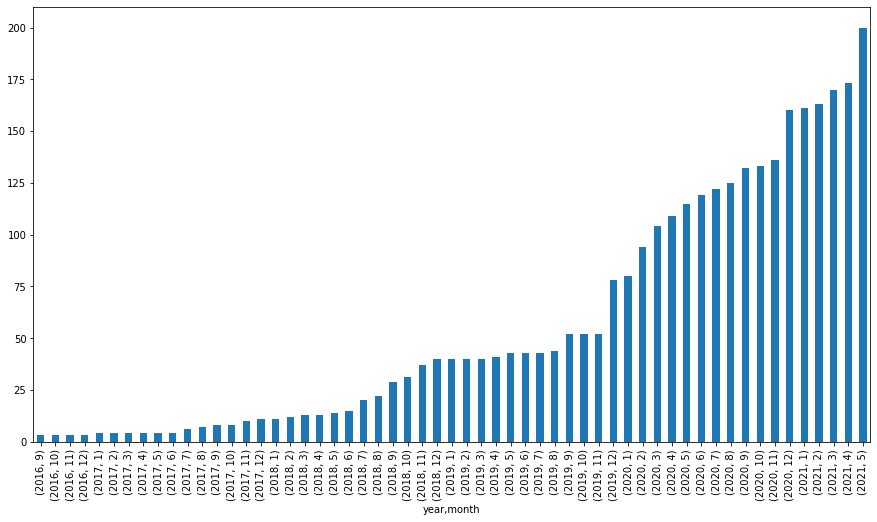

In [57]:
# cumulative number of systems since Sep 2016

inservice_groups.cumsum().plot(kind = 'bar', figsize = (15, 8))

Plotting production by in-service dates below (year/month), again, it looks similar to the plots we generated using ato dates and yields similar conclusions.

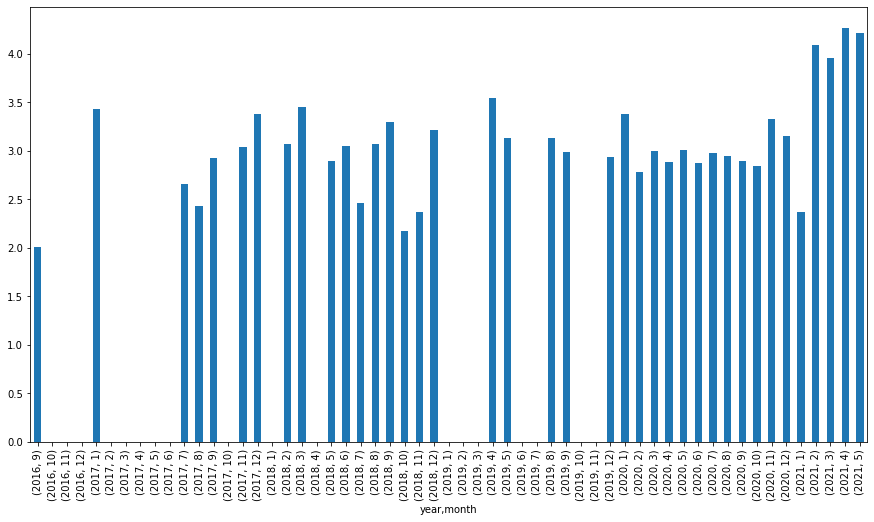

In [58]:
# plot average production of systems actually opened in each month since Sep 2016

df_inservice = pd.DataFrame()
df_inservice['year'] = group.apply(lambda x: x['ato_date'].dt.year)
df_inservice['month'] = group.apply(lambda x: x['ato_date'].dt.month)
df_inservice['production'] = group.apply(lambda x: x['actual_kwh'])
df_inservice['yield'] = group.apply(lambda x: x['actual_kwh']/x['size_kwdc'])
inservice_groups = df_inservice.groupby([df_inservice['year'], df_inservice['month']])
inservice_plot = inservice_groups.mean()['yield']

year = 2016
month = 9
while year < 2021:
    try:
        inservice_plot[(year, month)]
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
    except:
        inservice_plot[(year, month)] = 0
        if month == 12: 
            year += 1
            month = 1
        else: month += 1
inservice_plot.sort_index(inplace = True)

inservice_plot.plot(kind = 'bar', figsize = (15, 8))

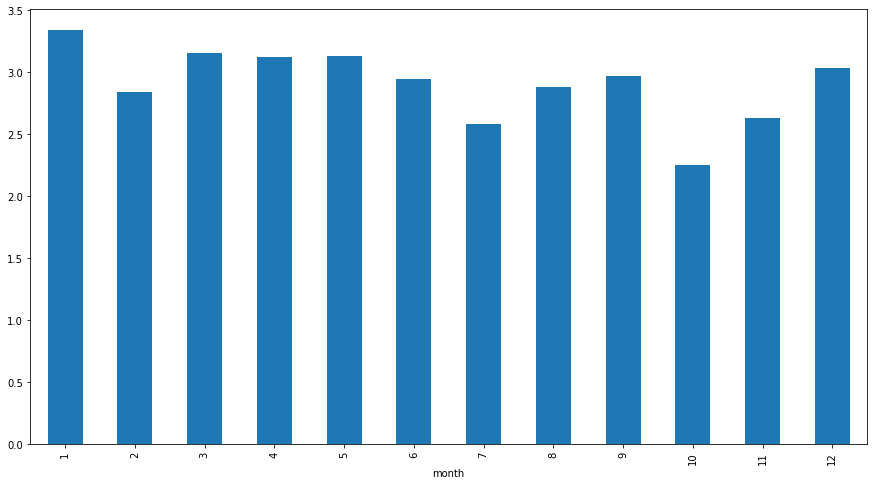

In [59]:
# average production of systems opened each month since Sep 2016 (by actual / in-service date) disregarding year

inservice_month = df_inservice.groupby(df_inservice['month'])
inservice_month.mean()['yield'].plot(kind = 'bar', figsize = (15, 8))

#### 2.3.8 (Production) Date

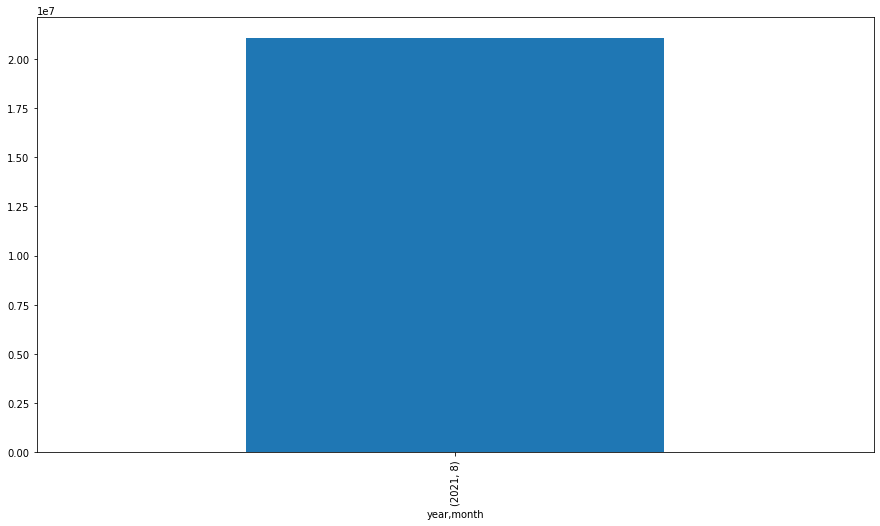

In [60]:
# plot TOTAL solar energy production as a function of time

df_date = pd.DataFrame()
df_date['year'] = group.apply(lambda x: x['production_date'].dt.year)
df_date['month'] = group.apply(lambda x: x['production_date'].dt.month)
df_date['production'] = group.apply(lambda x: x['actual_kwh'])
production_date_grouped = df_date.groupby([df_date['year'], df_date['month']])

production_date_grouped.sum()['production'].plot(kind = 'bar', figsize = (15, 8))

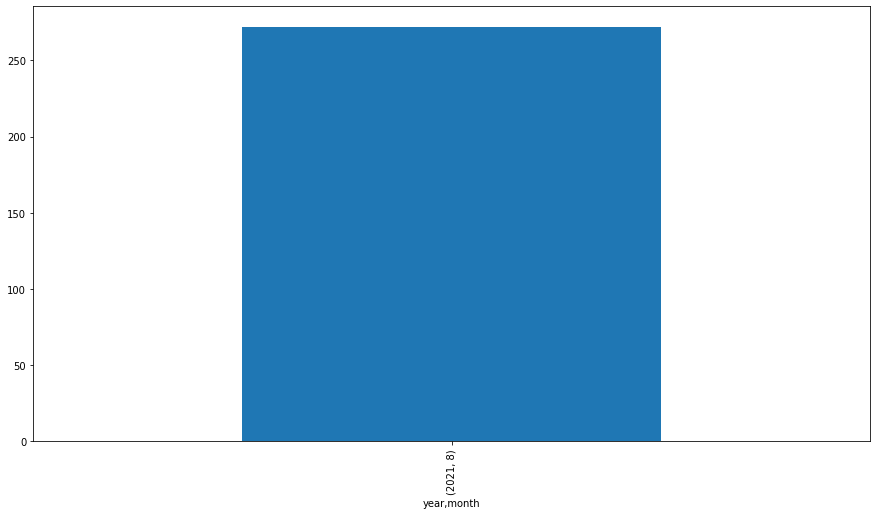

In [61]:
# AVERAGE energy production per contract as a function of time - cyclic with seasons

production_date_grouped.mean()['production'].plot(kind = 'bar', figsize = (15, 8))

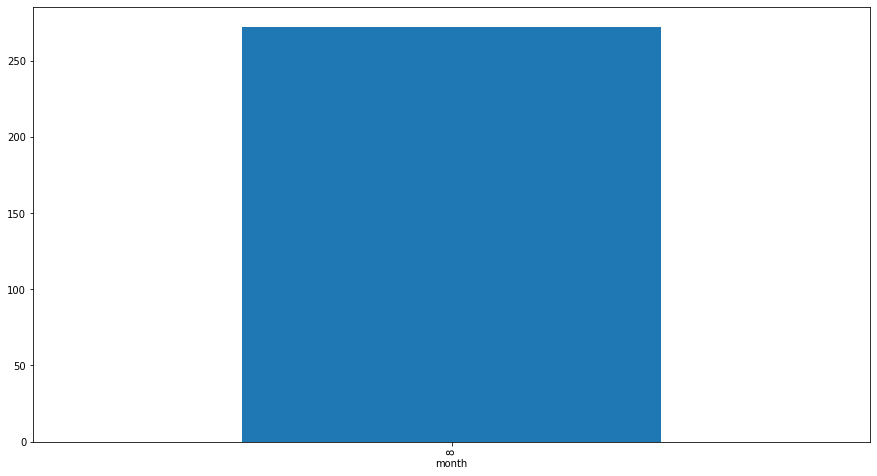

In [62]:
# average production per month disregarding year (over all years we have data for)

production_month = df_date.groupby(df_date['month'])
production_month.mean()['production'].plot(kind = 'bar', figsize = (15, 8))

# describe

#### 2.3.10 Host Type

In [63]:
# count unique contracts and type breakdowns for original data and supplementary data (slightly different)

id_unique = group.apply(lambda x: x['host_type'].unique()[0])
print(id_unique.value_counts())
print(df_contracts['host_type'].value_counts())

C&I            199
Residential      1
dtype: int64
C&I            217
Residential    168
Name: host_type, dtype: int64


As we can see, the supplementary data contains more contracts than the original. However, since we are focused on production, which is only found in the first dataframe, we will only be able to use those contracts in the main data. Further, since there is only one residential contract, we can consider it an anomaly or outlier and remove it.

In [64]:
# get rid of the singular residential contract

df.drop(df[df['host_type'] == 'Residential'].index, inplace = True)
group = df.groupby('contract_id') # re-group again by contract since some rows were deleted

#### 2.3.11 Revenue Type

# describe all of these xxx types and do more analysis

In [65]:
# get a summary of what types of revenue types exist and how many of each there are

df['revenue_type'].value_counts()

CREF                 20212
NEM                   9114
SFA                   3571
Ethos Prepaid PPA     2674
PPA                   1299
NEM PPA               1262
Name: revenue_type, dtype: int64

In [66]:
# since there seem to be many missing values, insert "missing" to those slots

df['revenue_type'].fillna('missing', inplace = True)

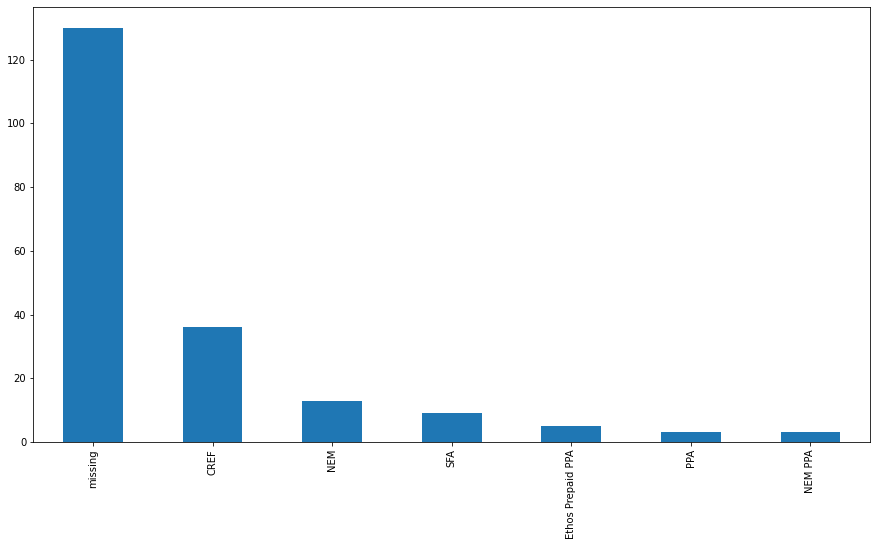

In [67]:
# plot consolidated categories and their counts by contract

revenue_type_unique = group.apply(lambda x: x['revenue_type'].unique()[0])
revenue_type_unique.value_counts().plot(kind = 'bar', figsize = (15, 8))

#### 2.3.12 Interconnection Type

In [68]:
# get a summary of what types of interconnection types exist and how many of each there are

df['interconnection_type'].value_counts()

CREF    37707
NEM     36518
Name: interconnection_type, dtype: int64

In [69]:
# still some many missing values, so insert "missing" to those slots

df['interconnection_type'].fillna('missing', inplace = True)

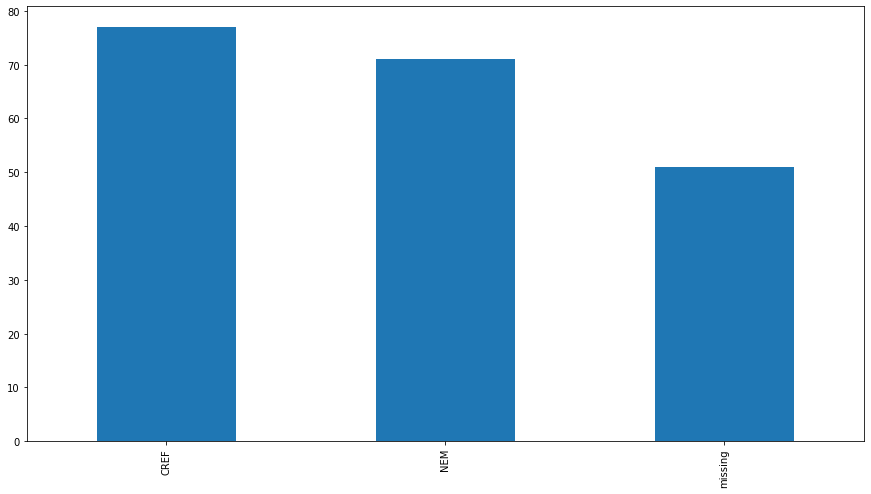

In [70]:
# plot consolidated categories and their counts by contract

interconnection_type_unique = group.apply(lambda x: x['interconnection_type'].unique()[0])
interconnection_type_unique.value_counts().plot(kind = 'bar', figsize = (15, 8))

#### 2.3.13 Registry Facility

In [71]:
# get a summary of what types of registry facilities exist and how many of each there are

df['registry_facility_name'].value_counts()

NON241648    899
NON241348    899
NON241695    899
NON241371    899
NON242065    899
            ... 
NON241602    138
NON280635    138
NON261741      1
NON297156      1
NON241352      1
Name: registry_facility_name, Length: 121, dtype: int64

In [72]:
# check how many rows are filled in so we can see if there are any missing values

sum(df['registry_facility_name'].value_counts())

62841

In [73]:
# since there are missing values, mark them

df['registry_facility_name'].fillna('missing', inplace = True)

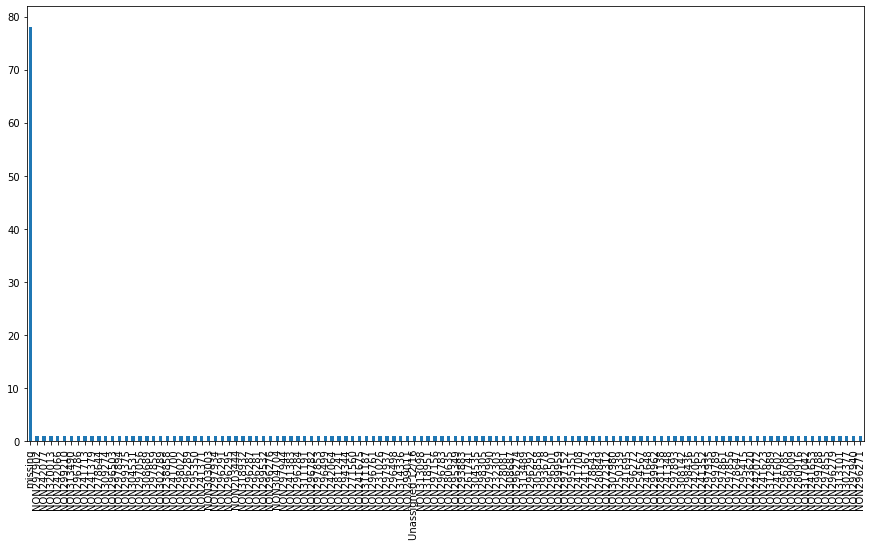

In [74]:
# plot consolidated categories and counts by contract

registry_facility_unique = group.apply(lambda x: x['registry_facility_name'].unique()[0])
registry_facility_unique.value_counts().plot(kind = 'bar', figsize = (15, 8))

#### 2.3.14 CREF

In [75]:
# get a summary of what CREF types exist and how many of each there are

df['cref_short_name'].value_counts()

NCS05    899
NCS06    899
NCS02    899
NCS07    898
NCS01    898
NCS03    898
NCS09    891
NCS11    748
NCS10    626
NCS13    626
NCS18    626
NCS15    626
NCS14    626
NCS16    626
NCS17    444
NCS19    444
NCS08    138
NCS04      1
Name: cref_short_name, dtype: int64

In [76]:
# again, there seem to be a lot of missing values, so mark them "missing"

df['cref_short_name'].fillna('missing', inplace = True)

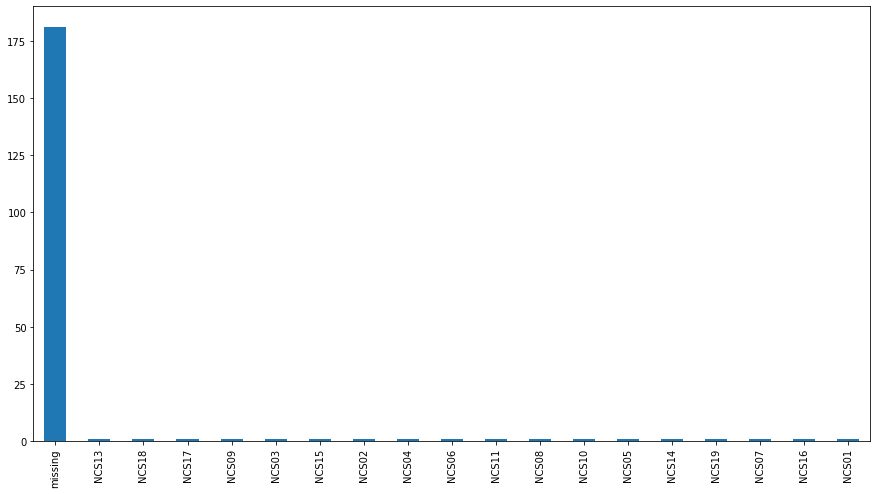

In [77]:
# plot consolidated categories and counts by contract

cref_unique = group.apply(lambda x: x['cref_short_name'].unique()[0])
cref_unique.value_counts().plot(kind = 'bar', figsize = (15, 8))

#### 2.3.15 Subscriber Organization

In [78]:
# get a summary of what subscriber organizations exist and how many of each there are

df['subscriber_orginization'].value_counts()

CleanChoice    6283
Arcadia        5530
Name: subscriber_orginization, dtype: int64

In [79]:
# mark missing values

df['subscriber_orginization'].fillna('missing', inplace = True)

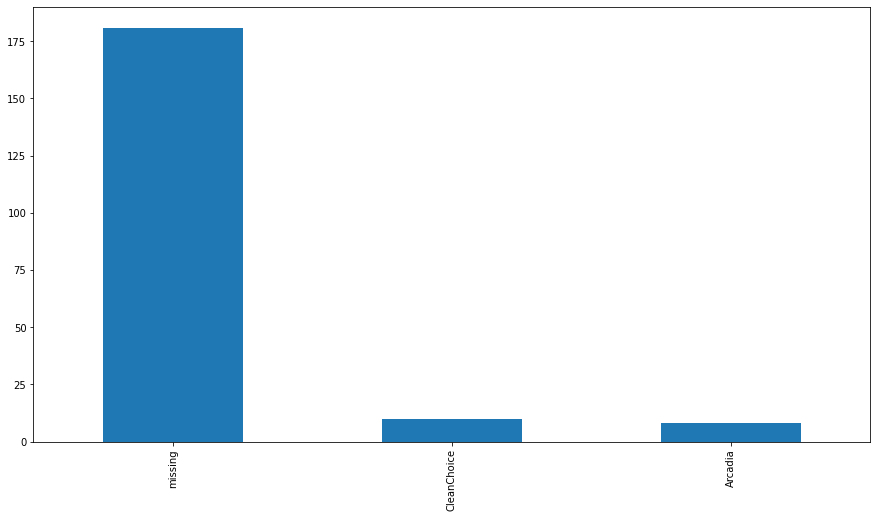

In [80]:
# plot counts by contract

subscriber_organization_unique = group.apply(lambda x: x['subscriber_orginization'].unique()[0])
subscriber_organization_unique.value_counts().plot(kind = 'bar', figsize = (15, 8))

In [81]:
subscriber_organization_unique.value_counts()

missing        181
CleanChoice     10
Arcadia          8
dtype: int64

#### 2.3.17 Degradation

In [82]:
# add a column to dataframe for (system) age

df['system age'] = df.apply(lambda x: system_age[x['contract_id']].days, axis=1)

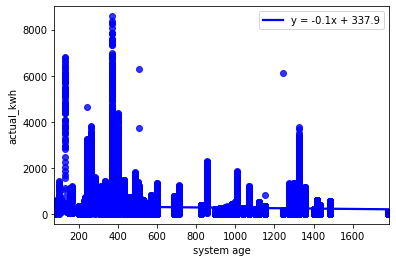

In [83]:
# plot system age versus degradation for an overall idea of degradation across systems

degradation = df[['system age', 'actual_kwh']].dropna()

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(degradation['system age'], degradation['actual_kwh'])

# use line_kws to set line label for legend
ax = sns.regplot(x = 'system age', y = 'actual_kwh', data = degradation, color = 'b', \
line_kws = {'label':"y = {0:.1f}x + {1:.1f}".format(slope,intercept)})

ax.legend()
plt.show() # slope on this graph = daily degradation in kwh

In [84]:
# as a percentage

slope/np.mean(df['actual_kwh'].dropna())

-0.000299146678243474

In [85]:
# next, create a column for individual ages (for each data point, what's the age of the system at that point?)

df['ages'] = (df['production_date'] - df['in_service_date']).dt.days

In [86]:
df.columns

Index(['holding_company_id', 'project_company_id', 'contract_id', 'size_kwdc',
       'production_date', 'ato_date', 'actual_kwh', 'expected_kwh',
       'weather_adjusted_expected_kwh', 'in_service_date', 'host_type',
       'revenue_type', 'interconnection_type', 'registry_facility_name',
       'cref_short_name', 'subscriber_orginization', 'system_yield_as_built',
       'system_yield_finance', 'annual_degradation_engr',
       'annual_degradation_finance', 'yield', 'system age', 'ages'],
      dtype='object')

In [101]:
# regression to find degradation per contract / system

degradations = {}

for contract in contracts.index:
    df_degradation = df[df['contract_id'] == contract][['ages', 'actual_kwh']].dropna()
    print(df[df['contract_id'] == contract][['ages', 'actual_kwh']].dropna())
    print(df_degradation)
    print(df_degradation.isna())
    print(df_degradation[df_degradation.isna()])
    if not df_degradation.empty:
        degradations[contract] = stats.linregress(df_degradation['ages'], df_degradation['actual_kwh'])

Empty DataFrame
Columns: [ages, actual_kwh]
Index: []
Empty DataFrame
Columns: [ages, actual_kwh]
Index: []
Empty DataFrame
Columns: [ages, actual_kwh]
Index: []
Empty DataFrame
Columns: [ages, actual_kwh]
Index: []
Empty DataFrame
Columns: [ages, actual_kwh]
Index: []
Empty DataFrame
Columns: [ages, actual_kwh]
Index: []
Empty DataFrame
Columns: [ages, actual_kwh]
Index: []
Empty DataFrame
Columns: [ages, actual_kwh]
Index: []
       ages  actual_kwh
21      972    0.000000
60      972    0.000000
99      972    0.000000
138     972    0.000000
177     972    0.000000
...     ...         ...
83138   972   64.689599
83338   972   76.752605
83538   972   83.313043
83738   972   94.361744
83938   972   98.053601

[898 rows x 2 columns]
       ages  actual_kwh
21      972    0.000000
60      972    0.000000
99      972    0.000000
138     972    0.000000
177     972    0.000000
...     ...         ...
83138   972   64.689599
83338   972   76.752605
83538   972   83.313043
83738   972   94

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
29     1485   72.847426
68     1485   51.064768
107    1485   79.996787
146    1485   74.765560
185    1485   50.384077
...     ...         ...
83171  1485  335.152207
83371  1485  463.027131
83571  1485  438.415187
83771  1485  515.166592
83971  1485  536.966794

[898 rows x 2 columns]
       ages  actual_kwh
29     1485   72.847426
68     1485   51.064768
107    1485   79.996787
146    1485   74.765560
185    1485   50.384077
...     ...         ...
83171  1485  335.152207
83371  1485  463.027131
83571  1485  438.415187
83771  1485  515.166592
83971  1485  536.966794

[898 rows x 2 columns]
        ages  actual_kwh
29     False       False
68     False       False
107    False       False
146    False       False
185    False       False
...      ...         ...
83171  False       False
83371  False       False
83571  False       False
83771  False       False
83971  False       False

[898 rows x 2 columns]
       ages  actual_kwh
29      NaN         NaN
68  

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
18      NaN         NaN
57      NaN         NaN
96      NaN         NaN
135     NaN         NaN
174     NaN         NaN
...     ...         ...
83122   NaN         NaN
83322   NaN         NaN
83522   NaN         NaN
83722   NaN         NaN
83922   NaN         NaN

[898 rows x 2 columns]
       ages  actual_kwh
11      970    0.000000
50      970    0.000000
89      970    0.000000
128     970    0.000000
167     970    0.000000
...     ...         ...
83071   970  170.892852
83271   970  211.151131
83471   970  182.769461
83671   970  248.604974
83871   970  252.684939

[898 rows x 2 columns]
       ages  actual_kwh
11      970    0.000000
50      970    0.000000
89      970    0.000000
128     970    0.000000
167     970    0.000000
...     ...         ...
83071   970  170.892852
83271   970  211.151131
83471   970  182.769461
83671   970  248.604974
83871   970  252.684939

[898 rows x 2 columns]
        ages  actual_kwh
11     False       False
50     False  

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
34     1042   11.180000
73     1042    7.976000
112    1042   37.452000
151    1042   11.013000
190    1042    7.917000
...     ...         ...
83182  1042   99.825302
83382  1042  126.696201
83582  1042  117.152443
83782  1042  141.009433
83982  1042  146.947647

[892 rows x 2 columns]
       ages  actual_kwh
34     1042   11.180000
73     1042    7.976000
112    1042   37.452000
151    1042   11.013000
190    1042    7.917000
...     ...         ...
83182  1042   99.825302
83382  1042  126.696201
83582  1042  117.152443
83782  1042  141.009433
83982  1042  146.947647

[892 rows x 2 columns]
        ages  actual_kwh
34     False       False
73     False       False
112    False       False
151    False       False
190    False       False
...      ...         ...
83182  False       False
83382  False       False
83582  False       False
83782  False       False
83982  False       False

[892 rows x 2 columns]
       ages  actual_kwh
34      NaN         NaN
73  

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
11079   691  295.283302
11129   691  272.696058
11179   691  124.925048
11229   691  306.532028
11279   691  197.405453
...     ...         ...
83031   691  421.909293
83231   691  513.400946
83431   691  551.805292
83631   691  615.881452
83831   691  633.780481

[622 rows x 2 columns]
       ages  actual_kwh
11079   691  295.283302
11129   691  272.696058
11179   691  124.925048
11229   691  306.532028
11279   691  197.405453
...     ...         ...
83031   691  421.909293
83231   691  513.400946
83431   691  551.805292
83631   691  615.881452
83831   691  633.780481

[622 rows x 2 columns]
        ages  actual_kwh
11079  False       False
11129  False       False
11179  False       False
11229  False       False
11279  False       False
...      ...         ...
83031  False       False
83231  False       False
83431  False       False
83631  False       False
83831  False       False

[622 rows x 2 columns]
       ages  actual_kwh
11079   NaN         NaN
1112

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages    actual_kwh
15688   567 -8.333330e-07
15763   567 -5.555560e-07
15838   567 -5.555560e-07
15913   567 -8.333330e-07
15988   567 -5.555560e-07
...     ...           ...
83195   567  8.351379e+01
83395   567  1.202545e+02
83595   567  1.132668e+02
83795   567  1.390912e+02
83995   567  1.417077e+02

[534 rows x 2 columns]
       ages    actual_kwh
15688   567 -8.333330e-07
15763   567 -5.555560e-07
15838   567 -5.555560e-07
15913   567 -8.333330e-07
15988   567 -5.555560e-07
...     ...           ...
83195   567  8.351379e+01
83395   567  1.202545e+02
83595   567  1.132668e+02
83795   567  1.390912e+02
83995   567  1.417077e+02

[534 rows x 2 columns]
        ages  actual_kwh
15688  False       False
15763  False       False
15838  False       False
15913  False       False
15988  False       False
...      ...         ...
83195  False       False
83395  False       False
83595  False       False
83795  False       False
83995  False       False

[534 rows x 2 columns]
    

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

        ages  actual_kwh
15662  False       False
15737  False       False
15812  False       False
15887  False       False
15962  False       False
...      ...         ...
83127  False       False
83327  False       False
83527  False       False
83727  False       False
83927  False       False

[534 rows x 2 columns]
       ages  actual_kwh
15662   NaN         NaN
15737   NaN         NaN
15812   NaN         NaN
15887   NaN         NaN
15962   NaN         NaN
...     ...         ...
83127   NaN         NaN
83327   NaN         NaN
83527   NaN         NaN
83727   NaN         NaN
83927   NaN         NaN

[534 rows x 2 columns]
       ages  actual_kwh
15658   560    0.000712
15733   560    0.000712
15808   560    0.000712
15883   560    0.000712
15958   560    0.000712
...     ...         ...
83119   560  162.434200
83319   560  201.891032
83519   560  186.910982
83719   560  235.074654
83919   560  240.746390

[527 rows x 2 columns]
       ages  actual_kwh
15658   560    0.000712
1573

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
18015   551   76.254106
18092   551   72.871690
18169   551   76.692802
18246   551   48.875894
18323   551   11.785308
...     ...         ...
83197   551  151.918733
83397   551  201.062212
83597   551  185.865369
83797   551  228.324337
83997   551  236.296431

[503 rows x 2 columns]
       ages  actual_kwh
18015   551   76.254106
18092   551   72.871690
18169   551   76.692802
18246   551   48.875894
18323   551   11.785308
...     ...         ...
83197   551  151.918733
83397   551  201.062212
83597   551  185.865369
83797   551  228.324337
83997   551  236.296431

[503 rows x 2 columns]
        ages  actual_kwh
18015  False       False
18092  False       False
18169  False       False
18246  False       False
18323  False       False
...      ...         ...
83197  False       False
83397  False       False
83597  False       False
83797  False       False
83997  False       False

[503 rows x 2 columns]
       ages  actual_kwh
18015   NaN         NaN
1809

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py


       ages  actual_kwh
20195   526    0.000176
20285   526    0.000176
20375   526    0.000176
20465   526    0.000176
20555   526    0.000176
...     ...         ...
83037   526  136.632294
83237   526  176.082310
83437   526  170.098868
83637   526  204.531581
83837   526  210.883307

[463 rows x 2 columns]
        ages  actual_kwh
20195  False       False
20285  False       False
20375  False       False
20465  False       False
20555  False       False
...      ...         ...
83037  False       False
83237  False       False
83437  False       False
83637  False       False
83837  False       False

[463 rows x 2 columns]
       ages  actual_kwh
20195   NaN         NaN
20285   NaN         NaN
20375   NaN         NaN
20465   NaN         NaN
20555   NaN         NaN
...     ...         ...
83037   NaN         NaN
83237   NaN         NaN
83437   NaN         NaN
83637   NaN         NaN
83837   NaN         NaN

[463 rows x 2 columns]
       ages  actual_kwh
20183   516    0.000150
202

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py


       ages   actual_kwh
23029   505     0.000000
23130   505     0.000000
23231   505     0.000000
23332   505     0.000000
23433   505     0.000000
...     ...          ...
83080   505   909.075585
83280   505  1115.390135
83480   505  1050.154095
83680   505  1360.621823
83880   505  1364.105778

[440 rows x 2 columns]
        ages  actual_kwh
23029  False       False
23130  False       False
23231  False       False
23332  False       False
23433  False       False
...      ...         ...
83080  False       False
83280  False       False
83480  False       False
83680  False       False
83880  False       False

[440 rows x 2 columns]
       ages  actual_kwh
23029   NaN         NaN
23130   NaN         NaN
23231   NaN         NaN
23332   NaN         NaN
23433   NaN         NaN
...     ...         ...
83080   NaN         NaN
83280   NaN         NaN
83480   NaN         NaN
83680   NaN         NaN
83880   NaN         NaN

[440 rows x 2 columns]
       ages  actual_kwh
23032   516   9

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
29356   447    0.000000
29469   447    0.000000
29582   447    0.000000
29695   447    0.000000
29808   447    0.000000
...     ...         ...
83100   447  487.638594
83300   447  604.535681
83500   447  576.764528
83700   447  723.434957
83900   447  733.519192

[382 rows x 2 columns]
       ages  actual_kwh
29356   447    0.000000
29469   447    0.000000
29582   447    0.000000
29695   447    0.000000
29808   447    0.000000
...     ...         ...
83100   447  487.638594
83300   447  604.535681
83500   447  576.764528
83700   447  723.434957
83900   447  733.519192

[382 rows x 2 columns]
        ages  actual_kwh
29356  False       False
29469  False       False
29582  False       False
29695  False       False
29808  False       False
...      ...         ...
83100  False       False
83300  False       False
83500  False       False
83700  False       False
83900  False       False

[382 rows x 2 columns]
       ages  actual_kwh
29356   NaN         NaN
2946

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
36368   383  131.466070
36488   383  184.371766
36608   383  126.394511
36728   383  114.031207
36848   383  188.937772
...     ...         ...
83087   383  293.394208
83287   383  338.095356
83487   383  372.283583
83687   383  447.012389
83887   383  457.427783

[321 rows x 2 columns]
       ages  actual_kwh
36368   383  131.466070
36488   383  184.371766
36608   383  126.394511
36728   383  114.031207
36848   383  188.937772
...     ...         ...
83087   383  293.394208
83287   383  338.095356
83487   383  372.283583
83687   383  447.012389
83887   383  457.427783

[321 rows x 2 columns]
        ages  actual_kwh
36368  False       False
36488  False       False
36608  False       False
36728  False       False
36848  False       False
...      ...         ...
83087  False       False
83287  False       False
83487  False       False
83687  False       False
83887  False       False

[321 rows x 2 columns]
       ages  actual_kwh
36368   NaN         NaN
3648

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
43805   327    0.000000
43933   327    0.000000
44061   327    0.000000
44189   327    0.000000
44317   327    0.000000
...     ...         ...
83121   327  127.109529
83321   327    0.481016
83521   327    0.026163
83721   327    0.025906
83921   327    0.024131

[248 rows x 2 columns]
       ages  actual_kwh
43805   327    0.000000
43933   327    0.000000
44061   327    0.000000
44189   327    0.000000
44317   327    0.000000
...     ...         ...
83121   327  127.109529
83321   327    0.481016
83521   327    0.026163
83721   327    0.025906
83921   327    0.024131

[248 rows x 2 columns]
        ages  actual_kwh
43805  False       False
43933  False       False
44061  False       False
44189  False       False
44317  False       False
...      ...         ...
83121  False       False
83321  False       False
83521  False       False
83721  False       False
83921  False       False

[248 rows x 2 columns]
       ages  actual_kwh
43805   NaN         NaN
4393

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
56869   228   55.830657
57028   228  226.264945
57187   228  227.353009
57346   228   84.709918
57505   228  223.643195
...     ...         ...
83135   228  382.144087
83335   228  507.991484
83535   228  446.939880
83735   228  546.604159
83935   228  570.264934

[161 rows x 2 columns]
       ages  actual_kwh
56869   228   55.830657
57028   228  226.264945
57187   228  227.353009
57346   228   84.709918
57505   228  223.643195
...     ...         ...
83135   228  382.144087
83335   228  507.991484
83535   228  446.939880
83735   228  546.604159
83935   228  570.264934

[161 rows x 2 columns]
        ages  actual_kwh
56869  False       False
57028  False       False
57187  False       False
57346  False       False
57505  False       False
...      ...         ...
83135  False       False
83335  False       False
83535  False       False
83735  False       False
83935  False       False

[161 rows x 2 columns]
       ages  actual_kwh
56869   NaN         NaN
5702

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages   actual_kwh
55709   240   147.792649
55868   240   687.911562
56027   240   116.106361
56186   240   526.024643
56345   240   200.968869
...     ...          ...
83076   240  2179.242902
83276   240  2773.577510
83476   240  2669.815584
83676   240  3141.371173
83876   240  3227.136106

[168 rows x 2 columns]
       ages   actual_kwh
55709   240   147.792649
55868   240   687.911562
56027   240   116.106361
56186   240   526.024643
56345   240   200.968869
...     ...          ...
83076   240  2179.242902
83276   240  2773.577510
83476   240  2669.815584
83676   240  3141.371173
83876   240  3227.136106

[168 rows x 2 columns]
        ages  actual_kwh
55709  False       False
55868  False       False
56027  False       False
56186  False       False
56345  False       False
...      ...         ...
83076  False       False
83276  False       False
83476  False       False
83676  False       False
83876  False       False

[168 rows x 2 columns]
       ages  actual_kwh
5570

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages   actual_kwh
70179   131  1859.394110
70349   131  5467.205408
70519   131  5520.925442
70689   131  5142.251151
70859   131  5243.505824
...     ...          ...
83062   131  4529.687687
83262   131  5118.332526
83462   131  5346.732964
83662   131  6613.203322
83862   131  6829.744423

[78 rows x 2 columns]
       ages   actual_kwh
70179   131  1859.394110
70349   131  5467.205408
70519   131  5520.925442
70689   131  5142.251151
70859   131  5243.505824
...     ...          ...
83062   131  4529.687687
83262   131  5118.332526
83462   131  5346.732964
83662   131  6613.203322
83862   131  6829.744423

[78 rows x 2 columns]
        ages  actual_kwh
70179  False       False
70349  False       False
70519  False       False
70689  False       False
70859  False       False
...      ...         ...
83062  False       False
83262  False       False
83462  False       False
83662  False       False
83862  False       False

[78 rows x 2 columns]
       ages  actual_kwh
70179  

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

       ages  actual_kwh
76207  1783   17.192010
76381  1783    8.173759
76555  1783   12.161459
76729  1783   10.471983
76903  1783   13.833101
77077  1783   12.918861
77251  1783   14.764020
77425  1783   16.821440
77599  1783   12.489347
77773  1783   14.791089
77947  1783   11.011834
78121  1783   11.380089
78295  1783   17.625977
78469  1783   17.532904
78642  1783   16.767724
78815  1783   17.777683
78988  1783   14.690604
79161  1783   15.737102
79334  1783    4.306319
79507  1783   13.646379
79680  1783   14.766543
79853  1783   16.497722
80026  1783    8.862642
80199  1783    3.286023
80372  1783    5.248273
80545  1783   18.507608
80734  1783   16.481879
80934  1783   15.111766
81134  1783   11.265955
81334  1783   12.483741
81534  1783   17.882920
81734  1783   17.593009
81934  1783   15.759041
82134  1783   13.431901
82334  1783   10.008263
82534  1783    8.645627
82734  1783    2.189382
82934  1783   11.324269
83134  1783   12.279160
83334  1783   16.546726
83534  1783   14

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py


       ages  actual_kwh
80710    82  478.524561
80910    82  428.886384
81110    82  319.400581
81310    82  356.556649
81510    82  496.437174
81710    82  488.374500
81910    82  454.591088
82110    82  362.372071
82310    82  273.127046
82510    82  253.314372
82710    82   52.735322
82910    82  312.133926
83110    82  352.327320
83310    82  447.148699
83510    82  419.421466
83710    82  498.305320
83910    82  520.284161
       ages  actual_kwh
80710    82  478.524561
80910    82  428.886384
81110    82  319.400581
81310    82  356.556649
81510    82  496.437174
81710    82  488.374500
81910    82  454.591088
82110    82  362.372071
82310    82  273.127046
82510    82  253.314372
82710    82   52.735322
82910    82  312.133926
83110    82  352.327320
83310    82  447.148699
83510    82  419.421466
83710    82  498.305320
83910    82  520.284161
        ages  actual_kwh
80710  False       False
80910  False       False
81110  False       False
81310  False       False
81510  Fal

83827   NaN         NaN
       ages  actual_kwh
80811    82  312.913172
81011    82  295.064903
81211    82  218.996984
81411    82  273.048159
81611    82  341.830522
81811    82  331.476461
82011    82  308.027852
82211    82  255.333991
82411    82  190.375293
82611    82  157.516799
82811    82   37.729820
83011    82  246.407768
83211    82  233.932127
83411    82  308.776617
83611    82  291.428507
83811    82  371.030326
84011    82  374.752036
       ages  actual_kwh
80811    82  312.913172
81011    82  295.064903
81211    82  218.996984
81411    82  273.048159
81611    82  341.830522
81811    82  331.476461
82011    82  308.027852
82211    82  255.333991
82411    82  190.375293
82611    82  157.516799
82811    82   37.729820
83011    82  246.407768
83211    82  233.932127
83411    82  308.776617
83611    82  291.428507
83811    82  371.030326
84011    82  374.752036
        ages  actual_kwh
80811  False       False
81011  False       False
81211  False       False
81411  False

/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/katherineli/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/katherineli/anaconda3/lib/py

In [91]:
degradations

{'MUir9B9s': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'NLvUMRx3': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'nmTKhgg5': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'NQpn6W2J': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'oamkKPWL': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'pgSHiTNX': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'q5W3DpBs': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'Q5wHE4Ct': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'KPKdCoDN': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'rokVNeTF': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf),
 'RzKQkke8': LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pv

In [88]:
# convert degradation to percentages

degradation_percent = {}
for elem in degradations.items():
    degradation_percent[elem[0]] = elem[1][0]/(group.mean()['actual_kwh'][elem[0]])
    
degradation_percent.values()

dict_values([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [89]:
# average degradation after breaking down by contract

np.mean(list(degradation_percent.values()))

nan

In [90]:
# add a new column for degradation by contract

df['degradation'] = df.apply(lambda row: degradation_percent[row.contract_id], axis=1)

KeyError: 'd2Ww9Bvv'

In [ ]:
df.corr()['degradation']

### 2.4 Summary on Data Quality
In this section, I'll examine the quality of the data, e.g. completeness, consistency, formatting, and report any potential problems and solutions.

# 3 Data Preparation
## 3.1 Feature Selection
Determine which data will be used (selection of attributes/columns and observations/rows) and document reasons for inclusion or exclusion. 
## 3.2 Data Cleaning
Clean the data and describe actions taken. Techniques could include selection of subsets for examination, insertion of defaults or estimations using modelling for missing values. Note outliers/anomalies and potential impacts of these transformations on analysis results. 
## 3.3 Feature Engineering
It may be useful to derive new attributes from the data as combinations of existing attributes, and describe their creation. It may also be useful to merge or aggregate datasets, in which case you should be careful of duplicate values. 
## 3.4 Data Reformating
Finally, re-format the data as necessary (e.g. shuffling the order of inputs to a neural network or making syntactic changes like trimming field lengths).

# 4 Modelling
## 4.1 Model Selection
Select and document any modeling techniques to be used (regression, decision tree, neural network) along with assumptions made (uniform distribution, data type). 
## 4.2 Test Design
Before building the model, generate test design - will you need to split your data (e.g. into training, test, and validation sets), and if so, how? 
## 4.3 Parameter tuning
Next, run the selected modeling tool(s) on your data, list parameters used with justifications, and describe and interpret resulting models. 
## 4.4 Model Evaluation
Generally, you want to run different models with different parameters, then compare the results across the evaluation criteria established in earlier steps. Assess the quality or accuracy of each model, revise and tune iteratively.


# 5 Evaluation
## 5.1 Results
Summarize the results of the previous step in business terms - how well were your business objective(s) met? Models that meet business success criteria become approved models. 
## 5.2 Summary
After selecting appropriate models, review the work accomplished. Make sure models were correctly built, no important factors or tasks were overlooked, and all data are accessible/replicable for future analyses. 
## 5.3 Next Steps
Depending on assessed results, decide next steps, whether to move on to deployment, initiate further iterations, or move on to new data mining projects.

# 6 Deployment
## 6.1 Deployment Plan
Develop a plan for deploying relevant model(s). 
## 6.2 Monitoring Plan
Further develop a monitoring and maintenance plan to ensure correct usage of data mining results and avoid issues during the operational phase of model(s). 
## 6.3 Conduct Retrospective
Summarize results, conclusions and deliverables. Conduct any necessary retrospective analysis of what went well, what could be improved, and general experience documentation.